In [153]:
from src.__entro_plot__ import *
import h5py
%matplotlib inline
current_dir = os.getcwd() 
#mpl.style.use('classic')
sym=True
#mpl.rcParams.update({'font.size': 16})
model_name = 'xyz'
#model_name = 'ising'
#INDEX_VAL = 'max'
INDEX_VAL = 'mean'
#INDEX_VAL = 'dos'
roll_number = 51

directory = ''
if model_name == 'xyz':
    directory = current_dir + f"{kPSep}{model_name}{'_sym' if sym else ''}2{kPSep}results{str.upper(model_name)}"
else:
    directory = current_dir + f"{kPSep}final_2{kPSep}resultsSym"

print(sym)
directory

True


'c:\\University\\PHD\\CODES\\VQMC\\VarQMCSolver\\Python\\xyz_sym2\\resultsXYZ'


# Arbitrary number of particles

The average entanglement entropy of a uniformly distributed pure state in $\mathcal{H}$ restricted to subsystem A is given by the Page formula:
$$
    \langle S_A \rangle = 
    \left\{
    \begin{array}{lc}
        \Psi(d_Ad_B+1) - \Psi(d_B + 1) - \frac{d_A - 1}{2d_B}, & d_A\leq d_B \\
        \Psi(d_Ad_B+1) - \Psi(d_A + 1) - \frac{d_B - 1}{2d_A}, & \text{otherwise}
    \end{array}
    \right.,
$$

where $\Psi(x) = \Gamma ' (x) / \Gamma (x)$ is a digamma function.

Going to a thermodynamic limit, in big systems we can fix a fraction $f = V_A/V$ so what we get is:
$$
    \langle S_A \rangle = f V\ln 2 - 2 ^{-|1-2f|V-1} + O(2^{-V}),
$$
where we see the volueme law. For $f \neq \frac{1}{2}$, the second term is an exponentially small correction and becomes $-\delta _{f,1/2}$ as $V\rightarrow \infty$.

The variance is given for $d_A \leq d_B$:
$$
(\Delta S_A )^2 = \frac{d_A + d_B}{d_Ad_B + 1}\Psi ' (d_B + 1) - \Psi ' (d_Ad_B + 1) - \frac{(d_A - 1)(d_A + 2d_B - 1)}{4d_B^2(d_Ad_B + 1)},
$$
which again in the termodynamic limit becomes:
$$
(\Delta S_A )^2 = \left(\frac{1}{2}-\frac{1}{4}\delta_{f,1/2}\right)2^{-(1+|1-2f|)V}+o\left(2^{-(1+|1-2f|)V}\right).

## Helping functions

### Difference showcase

True


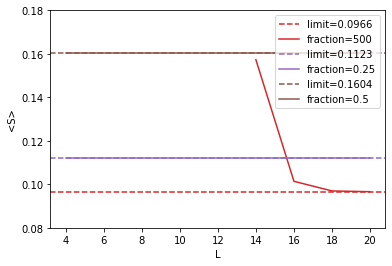

In [33]:
def plot_diff_page_their(L, frac):
    fig, ax = plt.subplots()
    for fr in frac:
        values = []
        for l in L:
            val = page_thermodynamic(1/2, l) - their_result(fr, l)
            values.append(val)
        l = 1000
        
        # after limit
        color = next(colors_ls_cyc)
        limit = page_thermodynamic(1/2, l) - their_result(fr, l)

        ax.axhline(y=limit, color=color, linestyle='--', label = f"limit={limit:.4f}")
        ax.plot(L, values, label=f'fraction={fr}', color=color)
    ax.legend()
    ax.set_ylim([0.08, 0.18])
    ax.set_xlabel('L')
    ax.set_ylabel('<S>')
print(sym)
plot_diff_page_their([i for i in range(4,22, 2)], [500, 1/4, 0.5])

True


# TESTS

In [108]:
Ns = 12
bc = 1

k = 0
p = 0
x = 1


fraction=0.1
print(sym)
model = create_model(model_name, Ns, k, p, x, bc)
#model.quiet = False

directory_save = current_dir + f"{kPSep}final_xyz_sym{kPSep}final"

True


### Energies

In [109]:
read_energy_bin(model.get_dir(directory))

c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz_sym2\resultsXYZ12\_xyz_sym,Ns=12,Ja=1.00,Jb=1.00,hx=0.20,hz=0.80,da=0.90,db=0.90,ea=0.50,eb=0.50,k=0.00,p=0,x=1,bc=1\ doesn't exists


""


In [47]:
read_energy_h5(model.get_dir(directory))

,energy
0,-10.291160
1,-9.847886
2,-9.584991
3,-9.543289
4,-9.388916
...,...
27007,16.372635
27008,16.881839
27009,17.563566
27010,18.121590


### Get entropies

In [48]:
df_bin = read_binary(model.get_dir(directory), Ns)
df_bin

,1,2,3,4,5,6,7,8,9,10,...,27003,27004,27005,27006,27007,27008,27009,27010,27011,27012
Ls,,,,,,,,,,,,,,,,,,,,,
1,0.675233,0.683230,0.676295,0.678417,0.658746,0.674103,0.671052,0.656854,0.659845,0.665441,...,0.430295,0.550259,0.583856,0.512285,0.530973,0.441731,0.514003,0.450464,0.424147,0.296789
2,1.340236,1.332839,1.327061,1.326640,1.285789,1.327706,1.306850,1.275456,1.280348,1.278772,...,0.748183,0.861946,0.895453,0.799397,0.809157,0.692950,0.739771,0.637297,0.568613,0.412723
3,1.607993,1.662555,1.690213,1.696628,1.662599,1.712007,1.700917,1.677644,1.684620,1.688497,...,1.021304,1.130561,1.102200,1.041734,1.004270,0.903758,0.900198,0.768112,0.647203,0.473028
4,1.848638,1.951923,2.021936,2.037578,2.013687,2.076794,2.071323,2.057133,2.068922,2.069717,...,1.259692,1.368508,1.254240,1.261201,1.156824,1.098070,1.031324,0.879987,0.701756,0.512217
5,1.991331,2.171676,2.300368,2.327684,2.323789,2.394864,2.405570,2.398962,2.418032,2.404326,...,1.468646,1.583234,1.367510,1.462206,1.275441,1.275687,1.138427,0.979506,0.742460,0.538855
6,2.105353,2.351719,2.551718,2.590671,2.606878,2.682565,2.719154,2.711301,2.739990,2.708747,...,1.650686,1.769236,1.451080,1.643029,1.364584,1.431460,1.221341,1.065304,0.773353,0.557633
7,2.177119,2.496870,2.759226,2.810146,2.850928,2.927672,2.992727,2.979029,3.014707,2.976250,...,1.801672,1.914837,1.511737,1.800456,1.429495,1.560559,1.281710,1.135414,0.796362,0.570755
8,2.234398,2.605364,2.917521,2.982205,3.046296,3.113777,3.205786,3.179454,3.228822,3.190436,...,1.911137,2.011289,1.553298,1.926962,1.473968,1.658233,1.321888,1.187409,0.812354,0.579448
9,2.264368,2.681367,3.025555,3.099148,3.173276,3.237309,3.342387,3.310856,3.369119,3.334988,...,1.974786,2.061578,1.577656,2.010739,1.500138,1.719567,1.344599,1.219414,0.821803,0.584424


In [49]:
df_h5 = read_entro_h5(model.get_dir(directory), Ns)
df_h5

,1,2,3,4,5,6,7,8,9,10,...,27003,27004,27005,27006,27007,27008,27009,27010,27011,27012
1,0.675233,0.683230,0.676295,0.678417,0.658746,0.674103,0.671052,0.656854,0.659845,0.665441,...,0.430295,0.550259,0.583856,0.512285,0.530973,0.441731,0.514003,0.450464,0.424147,0.296789
2,1.340236,1.332839,1.327061,1.326640,1.285789,1.327706,1.306850,1.275456,1.280348,1.278772,...,0.748183,0.861946,0.895453,0.799397,0.809157,0.692950,0.739771,0.637297,0.568613,0.412723
3,1.607993,1.662555,1.690213,1.696628,1.662599,1.712007,1.700917,1.677644,1.684620,1.688497,...,1.021304,1.130561,1.102200,1.041734,1.004270,0.903758,0.900198,0.768112,0.647203,0.473028
4,1.848638,1.951923,2.021936,2.037578,2.013687,2.076794,2.071323,2.057133,2.068922,2.069717,...,1.259692,1.368508,1.254240,1.261201,1.156824,1.098070,1.031324,0.879987,0.701756,0.512217
5,1.991331,2.171676,2.300368,2.327684,2.323789,2.394864,2.405570,2.398962,2.418032,2.404326,...,1.468646,1.583234,1.367510,1.462206,1.275441,1.275687,1.138427,0.979506,0.742460,0.538855
6,2.105353,2.351719,2.551718,2.590671,2.606878,2.682565,2.719154,2.711301,2.739990,2.708747,...,1.650686,1.769236,1.451080,1.643029,1.364584,1.431460,1.221341,1.065304,0.773353,0.557633
7,2.177119,2.496870,2.759226,2.810146,2.850928,2.927672,2.992727,2.979029,3.014707,2.976250,...,1.801672,1.914837,1.511737,1.800456,1.429495,1.560559,1.281710,1.135414,0.796362,0.570755
8,2.234398,2.605364,2.917521,2.982205,3.046296,3.113777,3.205786,3.179454,3.228822,3.190436,...,1.911137,2.011289,1.553298,1.926962,1.473968,1.658233,1.321888,1.187409,0.812354,0.579448
9,2.264368,2.681367,3.025555,3.099148,3.173276,3.237309,3.342387,3.310856,3.369119,3.334988,...,1.974786,2.061578,1.577656,2.010739,1.500138,1.719567,1.344599,1.219414,0.821803,0.584424
10,2.275583,2.700922,3.074848,3.147576,3.217554,3.285735,3.387427,3.354414,3.416589,3.378786,...,1.995235,2.076439,1.585689,2.040282,1.508808,1.740549,1.351912,1.230220,0.824930,0.586044


In [50]:
(df_h5-df_bin) 

,1,2,3,4,5,6,7,8,9,10,...,27003,27004,27005,27006,27007,27008,27009,27010,27011,27012
1,0.000000e+00,0.000000e+00,-6.661338e-16,2.220446e-16,1.110223e-16,0.000000e+00,0.000000e+00,-1.110223e-16,2.220446e-16,3.330669e-16,...,-7.771561e-16,0.000000e+00,1.110223e-16,1.221245e-15,-1.110223e-16,0.000000e+00,-1.110223e-16,3.885781e-16,5.551115e-17,1.665335e-16
2,2.220446e-16,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.440892e-16,2.220446e-16,0.000000e+00,...,-6.661338e-16,2.220446e-16,-1.110223e-16,4.440892e-16,-3.330669e-16,0.000000e+00,3.330669e-16,3.330669e-16,-3.330669e-16,3.330669e-16
3,2.220446e-16,-4.440892e-16,4.440892e-16,2.220446e-16,2.220446e-16,-4.440892e-16,4.440892e-16,4.440892e-16,0.000000e+00,-8.881784e-16,...,-2.220446e-16,2.220446e-16,0.000000e+00,8.881784e-16,6.661338e-16,2.220446e-16,1.110223e-16,3.330669e-16,1.110223e-16,3.885781e-16
4,-6.661338e-16,-8.881784e-16,2.220446e-15,-4.440892e-16,4.440892e-16,-8.881784e-16,0.000000e+00,0.000000e+00,8.881784e-16,4.440892e-16,...,-2.220446e-16,4.440892e-16,-2.442491e-15,4.440892e-16,8.881784e-16,-2.220446e-16,2.220446e-16,-1.110223e-16,-7.771561e-16,-1.110223e-16
5,1.554312e-15,4.440892e-16,-4.440892e-16,-1.776357e-15,1.332268e-15,0.000000e+00,4.440892e-16,-4.440892e-16,-4.440892e-16,8.881784e-16,...,-4.440892e-16,4.440892e-16,-6.661338e-16,4.440892e-16,6.661338e-16,0.000000e+00,4.440892e-16,4.440892e-16,-7.771561e-16,-2.220446e-16
6,4.440892e-16,8.881784e-16,1.776357e-15,-4.440892e-16,1.332268e-15,-8.881784e-16,0.000000e+00,0.000000e+00,0.000000e+00,4.440892e-16,...,4.440892e-16,1.110223e-15,0.000000e+00,4.440892e-16,-8.881784e-16,0.000000e+00,8.881784e-16,-1.332268e-15,-4.440892e-16,-1.443290e-15
7,8.881784e-16,-1.332268e-15,-8.881784e-16,0.000000e+00,4.440892e-16,-1.332268e-15,1.776357e-15,8.881784e-16,4.440892e-16,-8.881784e-16,...,2.220446e-16,1.110223e-15,4.440892e-16,0.000000e+00,1.110223e-15,-2.220446e-16,0.000000e+00,1.110223e-15,-3.330669e-16,4.440892e-16
8,-8.881784e-16,4.440892e-16,8.881784e-16,4.440892e-16,-4.440892e-16,-1.332268e-15,0.000000e+00,1.332268e-15,4.440892e-16,-1.776357e-15,...,1.332268e-15,4.440892e-16,-4.440892e-16,-4.440892e-16,0.000000e+00,0.000000e+00,4.440892e-16,-8.881784e-16,4.440892e-16,-1.665335e-15
9,0.000000e+00,4.440892e-16,8.881784e-16,1.332268e-15,0.000000e+00,-4.440892e-16,4.440892e-16,1.776357e-15,0.000000e+00,-8.881784e-16,...,-2.220446e-16,-8.881784e-16,-4.440892e-16,4.440892e-16,-4.440892e-16,-8.881784e-16,0.000000e+00,-1.998401e-15,9.992007e-16,9.992007e-16
10,0.000000e+00,0.000000e+00,-4.440892e-16,0.000000e+00,0.000000e+00,-8.881784e-16,1.332268e-15,0.000000e+00,4.440892e-16,0.000000e+00,...,-1.332268e-15,8.881784e-16,6.661338e-16,1.332268e-15,2.220446e-16,-4.440892e-16,6.661338e-16,1.110223e-15,1.332268e-15,1.110223e-16


In [51]:

df, av_idx, size, N, idx_val = read_entropies(model.get_dir(directory), Ns, fraction)
print(N, fraction * N)
print(size)
print(idx_val)
print(df.mean(axis=1))
df


			idx_roll=13500,idx_mean=14220,idx_dos=13580,idx_max=13075,we take mean
			E[idx_roll]=-0.19238743407509923,E[idx_mean]=0.04184367469517185,E[idx_dos]=-0.1660958399491188,E[idx_max]=-0.32911428425372236
			Entropy[idx]=6.33400050063505,Entropy_max=6.361083981553753,entropy_roll_max=6.346384202791504,entropy_roll_max[idx]=6.340695300966731
27012 2701.2000000000003
2700
{'roll': (13500, -0.19238743407509923), 'mean': (14220, 0.04184367469517185), 'dos': (13580, -0.1660958399491188), 'idx': (14220, 0.04184367469517185), 'max': (13075, -0.32911428425372236)}
1     0.693037
2     1.385884
3     2.077749
4     2.767297
5     3.454473
6     4.138059
7     4.813851
8     5.467083
9     6.042986
10    6.339736
dtype: float64


,12871,12872,12873,12874,12875,12876,12877,12878,12879,12880,...,15561,15562,15563,15564,15565,15566,15567,15568,15569,15570
1,0.692705,0.692664,0.692836,0.692843,0.692938,0.692722,0.692869,0.692963,0.692786,0.692821,...,0.693027,0.693119,0.693131,0.693107,0.693051,0.693117,0.693123,0.693087,0.693108,0.693026
2,1.385155,1.385077,1.385425,1.385409,1.385605,1.385116,1.385492,1.385636,1.385298,1.385412,...,1.385872,1.385972,1.386019,1.385973,1.385873,1.386012,1.385907,1.385988,1.385866,1.385797
3,2.076870,2.076331,2.077025,2.077195,2.077099,2.076714,2.077262,2.077369,2.077156,2.077383,...,2.077382,2.077280,2.077323,2.077322,2.077216,2.077573,2.077165,2.077602,2.077494,2.077518
4,2.766319,2.765340,2.766159,2.766668,2.765934,2.765972,2.766604,2.766917,2.766609,2.767191,...,2.766616,2.766234,2.766435,2.766358,2.766101,2.766813,2.766141,2.767134,2.766750,2.767209
5,3.453512,3.451921,3.453033,3.453665,3.452304,3.452916,3.453288,3.454100,3.453491,3.454607,...,3.453532,3.452728,3.453249,3.453059,3.452282,3.453681,3.452812,3.454378,3.453627,3.454649
6,4.136899,4.134840,4.136635,4.136914,4.134472,4.136148,4.136119,4.137484,4.136525,4.138379,...,4.136830,4.135706,4.136614,4.136009,4.134132,4.136601,4.136067,4.138281,4.136895,4.138743
7,4.812460,4.810170,4.812768,4.812588,4.809363,4.811111,4.810914,4.813455,4.811760,4.814392,...,4.812222,4.810872,4.812008,4.811030,4.807895,4.811979,4.811410,4.814623,4.812098,4.814974
8,5.465926,5.463361,5.466472,5.466523,5.461606,5.462640,5.463551,5.467054,5.464427,5.468220,...,5.465086,5.462601,5.465162,5.462883,5.458858,5.464526,5.464043,5.468477,5.464338,5.468131
9,6.043686,6.040443,6.043789,6.044069,6.037552,6.035596,6.040875,6.044739,6.040070,6.045764,...,6.040105,6.033822,6.039825,6.036210,6.030995,6.038668,6.039549,6.044348,6.038515,6.041901
10,6.342684,6.339463,6.344442,6.344779,6.335069,6.331316,6.340438,6.344114,6.338049,6.344358,...,6.333463,6.323718,6.331218,6.327353,6.321985,6.332052,6.333050,6.336981,6.329760,6.334284


### All sectors

In [52]:
df = model.symmetry_sectors_all(fraction, directory, var = False)
df

	-->For 20,sym=(0, 1),frac=0.1,bc=0 reading the whole entropies file binary
			idx_roll=13500,idx_mean=14220,idx_dos=13580,idx_max=13075,we take mean
			E[idx_roll]=-0.19238743407509923,E[idx_mean]=0.04184367469517185,E[idx_dos]=-0.1660958399491188,E[idx_max]=-0.32911428425372236
			Entropy[idx]=6.33400050063505,Entropy_max=6.361083981553753,entropy_roll_max=6.346384202791504,entropy_roll_max[idx]=6.340695300966731
	--->Ns=20,k=0,p=1,{'roll': (13500, -0.19238743407509923), 'mean': (14220, 0.04184367469517185), 'dos': (13580, -0.1660958399491188), 'idx': (14220, 0.04184367469517185), 'max': (13075, -0.32911428425372236)}
	-->For 20,sym=(1, 1),frac=0.1,bc=0 reading the whole entropies file binary
			idx_roll=26666,idx_mean=27493,idx_dos=26336,idx_max=25988,we take mean
			E[idx_roll]=-0.13750829270746978,E[idx_mean]=3.2507115639496994e-05,E[idx_dos]=-0.19188644645859845,E[idx_max]=-0.24973061784182107
			Entropy[idx]=6.343725111476556,Entropy_max=6.357664110403039,entropy_roll_max=6.3489

,"(0, 1):27012:2700","(1, 1):52377:5238","(2, 1):52476:5248","(3, 1):52377:5238","(4, 1):52482:5248","(5, 1):52380:5238","(6, 1):52476:5248","(7, 1):52377:5238","(8, 1):52482:5248","(9, 1):52377:5238",...,"(12, 1):52482:5248","(13, 1):52377:5238","(14, 1):52476:5248","(15, 1):52380:5238","(16, 1):52482:5248","(17, 1):52377:5238","(18, 1):52476:5248","(19, 1):52377:5238","(0, -1):25476:2548","(10, -1):26496:2650"
1,0.693037,0.693039,0.693037,0.693038,0.693037,0.693040,0.693040,0.693040,0.693040,0.693038,...,0.693040,0.693040,0.693040,0.693040,0.693037,0.693038,0.693037,0.693039,0.693033,0.693031
2,1.385884,1.385903,1.385900,1.385903,1.385900,1.385906,1.385906,1.385906,1.385905,1.385904,...,1.385905,1.385906,1.385906,1.385906,1.385900,1.385903,1.385900,1.385903,1.385892,1.385882
3,2.077749,2.077861,2.077854,2.077864,2.077856,2.077862,2.077861,2.077864,2.077858,2.077860,...,2.077858,2.077864,2.077861,2.077862,2.077856,2.077864,2.077854,2.077861,2.077903,2.077768
4,2.767297,2.767530,2.767512,2.767535,2.767509,2.767525,2.767522,2.767530,2.767512,2.767523,...,2.767512,2.767530,2.767522,2.767525,2.767509,2.767535,2.767512,2.767530,2.767614,2.767218
5,3.454473,3.454856,3.454819,3.454855,3.454808,3.454842,3.454831,3.454850,3.454815,3.454838,...,3.454815,3.454850,3.454831,3.454842,3.454808,3.454855,3.454819,3.454856,3.454887,3.454357
6,4.138059,4.138674,4.138615,4.138666,4.138595,4.138651,4.138625,4.138661,4.138601,4.138648,...,4.138601,4.138661,4.138625,4.138651,4.138595,4.138666,4.138615,4.138674,4.138619,4.137862
7,4.813851,4.814883,4.814791,4.814863,4.814764,4.814850,4.814796,4.814865,4.814772,4.814846,...,4.814772,4.814865,4.814796,4.814850,4.814764,4.814863,4.814791,4.814883,4.814520,4.813625
8,5.467083,5.468815,5.468678,5.468784,5.468641,5.468766,5.468676,5.468799,5.468648,5.468769,...,5.468648,5.468799,5.468676,5.468766,5.468641,5.468784,5.468678,5.468815,5.468008,5.466784
9,6.042986,6.045943,6.045754,6.045911,6.045710,6.045883,6.045747,6.045950,6.045714,6.045888,...,6.045714,6.045950,6.045747,6.045883,6.045710,6.045911,6.045754,6.045943,6.043880,6.042754
10,6.339736,6.343542,6.343455,6.343538,6.343388,6.343486,6.343443,6.343565,6.343394,6.343498,...,6.343394,6.343565,6.343443,6.343486,6.343388,6.343538,6.343455,6.343542,6.340528,6.338888


In [53]:
model.average_symmetry_sectors_df(df)

		->Total number of states = 104860 out of 1048576 frac = 0.1000



,av_Sr,av_So,av_S
1,0.693034,0.693039,0.693038
2,1.385888,1.385904,1.385902
3,2.077821,2.077860,2.077856
4,2.767439,2.767522,2.767514
5,3.454653,3.454835,3.454817
6,4.138300,4.138637,4.138604
7,4.814137,4.814825,4.814756
8,5.467494,5.468730,5.468607
9,6.043396,6.045833,6.045589
10,6.340104,6.343479,6.343141


### Test the plot values

In [54]:
Ns = 20
bc = 0

k = 0
p = 1
x = 1


fraction=0.1
print(sym)
model = create_model(model_name, Ns, k, p, x, bc)
print(model.get_dir(directory))

True
c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz_sym2\resultsXYZ20\_xyz_sym,Ns=20,Ja=1.00,Jb=1.00,hx=0.20,hz=0.80,da=0.90,db=0.90,ea=0.50,eb=0.50,k=0.00,p=1,x=1,bc=0\


In [55]:
read_entropies(model.get_dir(directory), Ns, fraction)

			idx_roll=13500,idx_mean=14220,idx_dos=13580,idx_max=13075,we take mean
			E[idx_roll]=-0.19238743407509923,E[idx_mean]=0.04184367469517185,E[idx_dos]=-0.1660958399491188,E[idx_max]=-0.32911428425372236
			Entropy[idx]=6.33400050063505,Entropy_max=6.361083981553753,entropy_roll_max=6.346384202791504,entropy_roll_max[idx]=6.340695300966731


(       12871     12872     12873     12874     12875     12876     12877  \
 1   0.692705  0.692664  0.692836  0.692843  0.692938  0.692722  0.692869   
 2   1.385155  1.385077  1.385425  1.385409  1.385605  1.385116  1.385492   
 3   2.076870  2.076331  2.077025  2.077195  2.077099  2.076714  2.077262   
 4   2.766319  2.765340  2.766159  2.766668  2.765934  2.765972  2.766604   
 5   3.453512  3.451921  3.453033  3.453665  3.452304  3.452916  3.453288   
 6   4.136899  4.134840  4.136635  4.136914  4.134472  4.136148  4.136119   
 7   4.812460  4.810170  4.812768  4.812588  4.809363  4.811111  4.810914   
 8   5.465926  5.463361  5.466472  5.466523  5.461606  5.462640  5.463551   
 9   6.043686  6.040443  6.043789  6.044069  6.037552  6.035596  6.040875   
 10  6.342684  6.339463  6.344442  6.344779  6.335069  6.331316  6.340438   
 
        12878     12879     12880  ...     15561     15562     15563     15564  \
 1   0.692963  0.692786  0.692821  ...  0.693027  0.693119  0.693131 

In [56]:
dfs = []
fraction=100
ls = [l for l in range(12, 19, 2)]
for l in ls:
    model = create_model(model_name, l, k, p, x, bc)
    df, av_idx, val_num, N, idx_val = read_entropies(model.get_dir(directory), l, fraction)
    print(df)
    dfs.append(np.mean(df.iloc[-1]))


			idx_roll=111,idx_mean=122,idx_dos=107,idx_max=107,we take mean
			E[idx_roll]=-0.024660160878535394,E[idx_mean]=0.317753193864426,E[idx_dos]=-0.10861362373319891,E[idx_max]=-0.10861362373319891
			Entropy[idx]=3.438982857239075,Entropy_max=3.6463420808047964,entropy_roll_max=3.4652796674622586,entropy_roll_max[idx]=3.4525914298506266
        73        74        75        76        77        78        79   \
1  0.687872  0.671938  0.676678  0.688268  0.692047  0.692947  0.683413   
2  1.366229  1.341670  1.341297  1.374514  1.375690  1.377571  1.360222   
3  2.037361  1.998317  1.987231  2.054843  2.039428  2.024885  2.025429   
4  2.682511  2.611711  2.576516  2.695310  2.671284  2.601705  2.632661   
5  3.228612  3.137080  3.053577  3.230424  3.224378  3.086785  3.151806   
6  3.489138  3.405629  3.287669  3.477616  3.500790  3.292943  3.406603   

        80        81        82   ...       163       164       165       166  \
1  0.686976  0.692596  0.692347  ...  0.691200  0.67611

(0.0, 0.1)

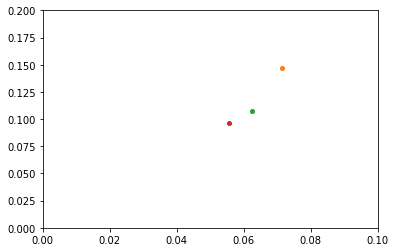

In [57]:
loc = 2
for l, df in enumerate(dfs):
    name = ls[l]
    value = name/2 * np.log(2) - 1/2 - df
    plt.scatter(1.0/(name), value)
#plt.yscale('log')
#plt.ylim([1e-2,2e-1])
plt.ylim([0,2e-1])
plt.xlim([0, 1/10])

# PLOTS

## ALL

In [58]:
def plot_all(L, directory, k = 0, p = 1, x = 1, bc = 0, frac_c = 100):
    
    fig, ax = plt.subplots(figsize = (14,10))
    ax.set_xlabel('Energy')
    ax.set_ylabel('S(E)')
    limit = page_thermodynamic(1/2, their_limit_l) - their_result(frac_c, their_limit_l)
    kolorki = []
    differences = {}
    for i, l in enumerate(L):
        model = create_model(model_name, l, k, p, x, bc)
            
        entropies, av_idx, val_num, N, idx_dic = read_entropies(model.get_dir(directory), l, 1.0)
        energies = read_energy_h5(model.get_dir(directory)).to_numpy().flatten()
        if len(energies)==0 or entropies.empty:
            print('empty')
            continue
        # find maximum from moving average
        df_roll = moving_average(entropies, roll_number).iloc[-1].to_numpy().flatten()
        idx_max, roll_val = idx_dic['max']
        idx_mean, val_mean = idx_dic['mean']
        idx_dos, val_dos = idx_dic['dos']

        # find dos
        dos, bins = np.histogram(energies, bins=100)
        parameters, _ = curve_fit(gauss, np.array(bins[1:]), np.array(dos, dtype=np.float32))

        # take entropies
        entropies = np.array(entropies.iloc[-1]).flatten()
        
        fraction = int(frac_c) if frac_c > 1.0 else int(frac_c * len(energies))
        lower = av_idx - fraction//2
        upper = av_idx + fraction//2
        entro_frac= entropies[lower:upper]
        mean_fraction = np.mean(entro_frac)
        print(f'\t->l={l},k={k},p={p},model={model_name}->[{lower}->{av_idx}->{upper}]:{INDEX_VAL} around {len(entro_frac)}')
        av_val = energies[av_idx]

        # --------- plot ---------
        color = next(colors_ls_cyc)
        dif = l*np.log(2)/2 - 1/2 - mean_fraction
        differences[l]=f'{-limit + dif:.5f}'   
                        
        ax.scatter(energies, entropies,
                   label = f"l={l}_mean_v={frac_c}->{mean_fraction:.5f},diff={dif:.4f}",
                   c = color, marker=next(markers), alpha = 0.5)
        
        ax.plot(energies, df_roll, color ='red')
        ax.axhline(y = page_result(np.power(2.0, l//2), np.power(2.0, l//2)), color = color)
        ax.axhline(y = page_result(np.power(2.0, l//2), np.power(2.0, l//2))-limit, color = color, alpha = 0.5, ls = ':')
       
        ax.fill_between(energies, page_result(np.power(2.0, l//2), np.power(2.0, l//2))-limit, page_result(np.power(2.0, l//2), np.power(2.0, l//2)), color=color, alpha=0.1, interpolate=False)
        ax.axvline(av_val, color = color)
        
        #ax.axvline(energies[roll_max], ls = '--', color = color, alpha = 0.5)
        ax.axvline(energies[lower], color = color, alpha = 0.3, ls = ':')
        ax.axvline(energies[upper], color = color, alpha = 0.3, ls = ':')
        
    ax.set_ylim([0, page_result(np.power(2.0, max(L)//2), np.power(2.0, max(L)//2))+0.2])
    ax.set_title(f"$their(v={frac_c})={limit:.5f}$\t\t\t\t $diff=(Nlog(2)/2-1/2-<S>)$\t\t\t\t $diff-their={differences}$",fontsize=9 )
    ax.legend(fontsize = 8)
    ax.tick_params(axis='both', which='both', length=0)
    plt.savefig(directory + f"_all_k={k},p={p},bc={bc}," + f",type={model_name},sym={sym},L={L},frac={frac_c}.png", facecolor='white')
    plt.savefig(directory + f"_all_k={k},p={p},bc={bc}," + f",type={model_name},sym={sym},L={L},frac={frac_c}.pdf", facecolor='white')

### DF_TOGETHER

In [59]:
def plot_df_together(L, dfs, energies_ls, xlim = [-10,15]):
    fig, ax = plt.subplots(1, len(L), figsize = (14,10))
    for i in range(len(L)):
        ax[i].set_xlabel('Energy')
        ax[i].set_ylabel('S(E)')
    
    for i, l in enumerate(L):
        entropies = dfs[i].loc[l//2]
        energies = energies_ls[i]
        #entropies = np.array(entropies,:].T).flatten()

        color = next(colors_ls_cyc)
            
        ax[i].scatter(np.array(energies), np.array(list(entropies)),
                label = str(l), alpha = 0.5,
                c = color, marker=next(markers))

        val = page_result(np.power(2.0, l//2), np.power(2.0, l//2))
        ax[i].axhline(y = val, color = color, label = f'Page/L--L={l}')

    #ax.set_ylim([0, (page_result(np.power(2.0, max(L)//2), np.power(2.0, max(L)//2))+0.2)/max(L)])
    for i in range(len(L)):
        ax[i].legend(fontsize = 8)
        ax[i].set_ylim([0,7.5])
        ax[i].set_xlim(xlim)
    plt.savefig(directory + f"_rainbows,type={model_name},sym={sym},L={L}.png", facecolor='white')
    plt.savefig(directory + f"_rainbows,type={model_name},sym={sym},L={L}.pdf", facecolor='white')

## RESCALE

In [60]:
def plot_rescale_df(L, dfs, energies_ls):
    fig, ax = plt.subplots(figsize = (14,10))
    ax.set_xlabel('Energy')
    ax.set_ylabel('S(E)')
    ax.set_title("$[S(E/l) - max(S(E/l))]/l)$")
    kolorki = []
    maxima = []
    for i, l in enumerate(L):
        res = page_result(np.power(2,l//2), np.power(2,l//2))
        entropies = np.array(dfs[i].loc[l//2])
        maxima.append(np.max(entropies))
        entropies = entropies/l
        entropies -= np.max(entropies)
        energies = energies_ls[i].flatten()/l
        
        color = next(colors_ls_cyc)
        kolorki.append(color)
        ax.scatter(energies, entropies,
                    label = str(l), alpha = 0.5,
                    c = color, marker=next(markers))
    print(maxima)
    for i, l in enumerate(L):
        res = page_result(np.power(2,l//2), np.power(2,l//2))
        print(l, (res)/l)
        ax.axhline(res/l - maxima[i]/l, color = kolorki[i], label = f'$[Digamma-max(S_L(E/L))/L--L={l}$')
    ax.legend(fontsize = 8)
    plt.savefig(directory + f"_rescale,type={model_name},sym={sym},L={L}.png", facecolor='white')
    plt.savefig(directory + f"_rescale,type={model_name},sym={sym},L={L}.pdf", facecolor='white')

## MAXIMA

In [155]:

def maxima(L, directory, bin_num = 200, k = 0, p = 1, x = 1, bc = 0):
    fig, ax = plt.subplots(4, figsize = (8,22))
    kolorki = []
    
    mean_idxs = []
    mean_vals = []
    
    max_idxs = []
    max_vals = []
    
    dos_idxs = []
    dos_vals = []
    
    brute_dos_idx = []
    brute_dos_val = []
    
    all_max_idx = []
    all_max = []
    all_max_ents = []
    
    ax[0].set_xlabel('E/V')
    ax[1].set_xlabel('E/V')
    ax[2].set_xlabel('V')
    ax[3].set_xlabel('1/V')
    
    ax_sub = ax[1].inset_axes([0.1,0.1,0.3,0.3])
    
    limit = page_thermodynamic(1/2, 300) - their_result(200, 300)
    limit_lev = abs(0.5 + np.log(0.5)) / 2.0
    for l in L:
        model = create_model(model_name, l, k, p, x, bc)

        entropies, av_idx, val_num, N, idx_dic = read_entropies(model.get_dir(directory), l, 1.0)
        energies = read_energy_h5(model.get_dir(directory)).to_numpy().flatten()
        if len(energies)==0 or entropies.empty:
            print('empty')
            continue
        
        color = next(colors_ls_cyc)
        kolorki.append(color)
        # ---------------------------------------------------------------------------------------------------------------
        # find maximum from moving average
        df_roll = moving_average(entropies, roll_number).iloc[-1].to_numpy().flatten()

        # ---------------------------------------------------------------------------------------------------------------

        idx_max, roll_val = idx_dic['roll']
        idx_mean, val_mean = idx_dic['mean']
        idx_dos, val_dos = idx_dic['dos']
        idx_all, val_all = idx_dic['max']
        # ---------------------------------------------------------------------------------------------------------------
        # find dos
        dos, bins = np.histogram(energies, bins=bin_num)
        parameters, _ = curve_fit(gauss, np.array(bins[1:]), np.array(dos, dtype=np.float32))
        gausik = gauss(bins, *parameters)
        
        # take entropies
        entropies = np.array(entropies.iloc[-1]).flatten()
        av_val = energies[av_idx]
        
        # ---------------------------------------------------------------------------------------------------------------
        mean_idxs.append(idx_mean)
        mean_vals.append(val_mean)
        
        max_idxs.append(idx_max)
        max_vals.append(roll_val)
        
        dos_idxs.append(idx_dos)
        dos_vals.append(val_dos)
        
        all_max_idx.append(idx_all)
        all_max.append(val_all)
        all_max_ents.append(entropies[idx_all])

        
        idx_max_brute = np.argmax(dos)
        idx_max_brute = find_nearest_idx_np(energies, bins[idx_max_brute])
        val_max_brute = energies[idx_max_brute]
        brute_dos_idx.append(idx_max_brute)
        brute_dos_val.append(val_max_brute)
        
        # plot sub
        if l == max(L):
            sub_num = int(0.1 * len(energies))
            ax_sub.scatter(energies[idx_mean - sub_num : idx_mean+sub_num], entropies[idx_mean - sub_num:idx_mean + sub_num], label = str(l), s = 1, color = 'yellow')
            ax_sub.plot(energies[idx_mean - sub_num : idx_mean+sub_num], df_roll[idx_mean - sub_num:idx_mean + sub_num], color = 'black')
            #ax_sub.scatter(energies, entropies/l, label = str(l))
            ax_sub.axvline(val_mean, label = f'mean={val_mean:.3e}', color = 'red')
            ax_sub.axvline(roll_val, label = f'max={roll_val:.3e}', color = 'blue')
            ax_sub.axvline(val_dos, label = f'dos={val_dos:.3e}', color = 'green')
            ax_sub.axvline(val_max_brute, label = f'brute={val_max_brute:.3e}', color = 'cyan')
            ax_sub.set_xticks([])
            #ax_sub.set_xticklabels([f'{i:.2e}' for i in [val_mean, roll_val, dos_v]], fontsize = 6, rotation = 45)
            ax_sub.set_yticks([])
        # ---------------------------------------------------------------------------------------------------------------
        ax[0].plot(bins, gausik, color=color)
        ax[0].scatter(np.array(bins[1:]), dos)
        ax[0].axvline(energies[idx_dos], color = color, alpha = 0.5)
        


        
        ax[1].scatter(energies, entropies,
                   label = model.get_info(),
                   c = color, marker=next(markers), alpha = 0.5)
        ax[1].plot(energies, df_roll, color ='red')

    ax[2].plot(L, dos_vals, label = 'dos', marker = next(markers))
    ax[2].plot(L, max_vals, label = 'roll_max', marker = next(markers))
    ax[2].plot(L, mean_vals, label = 'mean', marker = next(markers))
    ax[2].plot(L, brute_dos_val, label = 'brute_dos_max', marker = next(markers))
     
    print("Maximum entropies:",all_max_ents)
    all_page_differences = [l * np.log(2)/2.0 - 1/2.0 - all_max_ents[i] for i,l in enumerate(L)]   
    ax[3].plot(1/np.array(L), all_page_differences, marker=next(markers))
    ax[3].axhline(limit, linestyle='--', color='gray', label=f'correction={limit:.4f}')
    ax[3].axhline(limit_lev, linestyle=':', color='red', label = f'Vidmar2019 correction={limit_lev:.4f}')
    ax[3].set_ylabel('<S>_{page}-<S>_{max}')
    ax[3].set_xlim([0, 0.1])
    ax[3].legend(fontsize=6)
    ax[2].legend(fontsize = 6)
    ax[1].legend(fontsize = 6)
    ax[0].legend(fontsize = 6)
    ax_sub.legend(fontsize = 5)
    plt.savefig(directory + f"_maxima,k={k},p={p},bc={bc},type={model_name},L={L}.png", facecolor='white')
    plt.savefig(directory + f"_maxima,k={k},p={p},bc={bc},type={model_name},L={L}.pdf", facecolor='white')
    return [(mean_idxs[i], mean_vals[i])for i in range(len(L))],  [(max_idxs[i], max_vals[i])for i in range(len(L))],  [(dos_idxs[i], dos_vals[i])for i in range(len(L))], [(brute_dos_idx[i], brute_dos_val[i])for i in range(len(L))]



In [62]:
def maxima_df(L, dfs, ens, bin_num = 200):
    fig, ax = plt.subplots(3, figsize = (8,18))
    kolorki = []
    
    mean_idxs = []
    mean_vals = []
    
    max_idxs = []
    max_vals = []
    
    dos_idxs = []
    dos_vals = []
    
    ax[0].set_xlabel('E/V')
    ax[1].set_xlabel('E/V')
    ax[2].set_xlabel('V')
    
    ax_sub = ax[1].inset_axes([0.1,0.1,0.3,0.3])
    
    for i, l in enumerate(L):
        entropies = dfs[i]
        energies = ens[i].flatten()
        
        color = next(colors_ls_cyc)
        kolorki.append(color)
        # ---------------------------------------------------------------------------------------------------------------
        df_roll = moving_average(entropies, roll_number)
        #print(df_roll.iloc[-1])
        roll_max = find_maximum(df_roll).iloc[-1]
        df_roll = df_roll.iloc[-1].to_numpy().flatten()

        # ---------------------------------------------------------------------------------------------------------------

        #print(entropies.columns, model.N)
        energies = energies
        idx_mean = find_nearest_idx_np(energies, np.mean(energies))
        val_mean = energies[idx_mean]
        
        print(val_mean, idx_mean)
        
        roll_val = energies[roll_max]
        
        # take entropies
        entropies = np.array(entropies.loc[l//2]).flatten()


        # ---------------------------------------------------------------------------------------------------------------
        dos, bins = np.histogram(energies, bins=bin_num)
        dos = np.array(dos, dtype=np.float32)
        bins = np.array(bins[1:])
        ax[0].scatter(bins, dos, color = color, label = str(l))
        parameters, covariance = curve_fit(gauss, bins, dos)
        gausik = gauss(bins, *parameters)
        
        
        # ---------------------------------------------------------------------------------------------------------------
        mean_idxs.append(idx_mean)
        mean_vals.append(val_mean)
        
        max_idxs.append(roll_max)
        max_vals.append(roll_val)
        
        dos_n = find_nearest_idx_np(energies, parameters[2])
        dos_v = energies[dos_n]
        dos_idxs.append(dos_n)
        dos_vals.append(dos_v)
        
    
        if l == max(L):
            idx_sub = find_nearest_idx_np(energies, np.max(energies))
            sub_num = int(0.08 * len(energies))
            ax_sub.scatter(energies[idx_mean - sub_num : idx_mean+sub_num], entropies[idx_mean - sub_num:idx_mean + sub_num], label = str(l), s = 1, color = 'yellow')
            ax_sub.plot(energies[idx_mean - sub_num : idx_mean+sub_num], df_roll[idx_mean - sub_num:idx_mean + sub_num], color = 'black')
            #ax_sub.scatter(energies, entropies/l, label = str(l))
            ax_sub.axvline(val_mean, label = f'mean={val_mean:.3e}', color = 'red')
            ax_sub.axvline(roll_val, label = f'max={roll_val:.3e}', color = 'blue')
            ax_sub.axvline(dos_v, label = f'dos={dos_v:.3e}', color = 'green')
            ax_sub.set_xticks([])
            #ax_sub.set_xticklabels([f'{i:.2e}' for i in [val_mean, roll_val, dos_v]], fontsize = 6, rotation = 45)
            ax_sub.set_yticks([])
            
        # ---------------------------------------------------------------------------------------------------------------
        ax[0].plot(bins, gausik, color=color)
        idx_max = np.argmax(gausik)
        ax[0].axvline(bins[idx_max], color = color, alpha = 0.5)

        
        ax[1].scatter(np.array(energies), np.array(entropies),
                   label = str(l),
                   c = color, marker=next(markers), alpha = 0.5)
        ax[1].plot(energies, df_roll, color ='red')

    ax[2].plot(L, dos_vals, label = 'dos', marker = next(markers))
    ax[2].plot(L, max_vals, label = 'roll_max', marker = next(markers))
    ax[2].plot(L, mean_vals, label = 'mean', marker = next(markers))
    
    ax[2].legend(fontsize = 6)
    ax[1].legend(fontsize = 6)
    ax[0].legend(fontsize = 6)
    ax_sub.legend(fontsize = 5)
    
    return [(mean_idxs[i], mean_vals[i])for i in range(len(L))],  [(max_idxs[i], max_vals[i])for i in range(len(L))],  [(dos_idxs[i], dos_vals[i])for i in range(len(L))]


## FIT

In [63]:
def plot_fit(values, x, ax, label, color, fit_fun):
    # extract the power law behavior
    #log_val = np.log(values)
    #log_1_ov_x = np.log(1/x)
    #funct=(lambda x, a : np.power(1.0/x, a))
    #popt1, pcov1 = curve_fit(funct, 1.0/x, values)
    #print(popt1)

    
    #print(x, 1.0/x, values)
    
    param_bounds= ([0, -np.inf, 0],[np.inf,np.inf, min(values)]) if (fit_fun == fit_one_over_v2) else (([-np.inf, 0],[np.inf, min(values)]) if fit_fun == fit_one_over_v else ([-np.inf, -np.inf],[np.inf, np.inf]))
    popt, pcov = curve_fit(fit_fun, 1.0/x, values, bounds=param_bounds)
    
    xran = np.arange(10.0, 1e5, 2)
    #fit_val = fit_one_over_v(xran, popt[0], popt[1], popt[2])
    #fit_val = fit_one_over_v(xran, popt[0], popt[1])
    fit_val = fit_fun(xran, *popt)
    #print(xran[0:5], 1.0/xran[0:5],fit_val[0:5])
    #ax.plot(1.0/xran,funct(xran, *popt1), '--', color = color, alpha = 0.5)
    ax.plot(1.0/xran, fit_val, '--', color = color, alpha = 0.5)
    ax.scatter(1.0/np.max(xran), fit_fun(np.max(xran), *popt), s = 25, c = color)
    
    
    #ins = ax.inset_axes([0.1,0.1,0.2,0.2])
    #xs = np.array([1e14] + [i for i in range(int(1e4), int(1e5), 2)])
    #ins.plot(1.0/xs, fit_fun(xs, *popt), c=color)
    
    text = f'{label}:{popt}'
    return text, popt

## CLOUD

In [140]:

def plot_difference_cloud(L, fractions, directory = f"{kPSep}resultsSym", 
                          xscale = 'linear', yscale = 'linear', ylim = [1e-2, 1], 
                          fit_fun = fit_one_over_v,
                          avs = 'av_So', dif_fun = digamma_difference):
    
    fun_name = "1ovV" if fit_fun == fit_one_over_v else "1ovV2"
    dif_fun_name = "digamma" if dif_fun == digamma_difference else "page"
    av_name = "real" if avs=="av_Sr" else ("imag" if avs == "av_So" else ("obc" if avs == "S_obc" else "all"))
    
    fig, ax = plt.subplots(2, 2, figsize = (18,18))
    color_real, color_other, color_obc = tuple(random.sample(colors_ls, 3))
    marker_real, marker_other, marker_obc = tuple(random.sample(markers_ls, 3))
    
    
    L_obc = [12, 14, 16]
    inverse_L = 1.0/np.array(L)
    xlim = [0, 1.0/(np.min(L_obc))]
    yticks = [1, 5e-1, 1e-1, 5e-2, min(ylim)]
    ylabels = [str(i) for i in yticks]
    xticks = [0.0] + list(1.0/np.array(np.arange(np.min(L_obc)-2, np.max(L)+2, 2)))
    xlabels = [0] + [f'1/{i}' for i in np.arange(np.min(L_obc)-2, np.max(L)+2, 2)]#f'1/{i}' for i in ([100] + L)]
    
    ax[0][0].set_yscale(yscale)
    ax[0][0].set_xscale(xscale)
    #ax[0][0].set_yticks(yticks, ylabels)
    ax[0][0].set_xticks(xticks, xlabels, rotation = -45)
    if xscale == 'linear':
        ax[0][0].set_xlim(xlim)
    #ax[0][0].set_ylim(ylim)
    ax[0][0].set_xlabel("$1/V$", fontsize = 16)
    ax[0][0].set_ylabel("$S_{max} - <S_A>_{sec}$", fontsize = 16)
    ax[0][0].set_title("$[0.5*V*\ln{2} - 0.5] - <S_A>$ for different sectors. " + f"ν = {fractions[0]}.", fontsize = 14)
    
    ax[0][1].set_yscale(yscale)
    ax[0][1].set_xscale(xscale)  
    ax[0][1].set_xlabel("$1/V$")
    #ax[0][1].set_yticks(yticks, ylabels)
    ax[0][1].set_xticks(xticks, xlabels, rotation = -45)
    if xscale == 'linear':
        ax[0][1].set_xlim(xlim)
    if yscale == 'linear':
        ax[0][1].set_ylim(ylim)
    ax[0][1].set_ylabel("$S_{max} - <S_A>_{av}^{ν}$", fontsize = 16)
    ax[0][1].set_title("$[0.5*V*\ln{2} - 0.5] - <S_A>_{sec}$, different # of states ν" + f", sectors={av_name}", fontsize = 14)
    
    ax[1][0].set_yscale(yscale)
    ax[1][0].set_xscale(xscale)
    #ax[1][0].set_yticks(yticks, ylabels)
    ax[1][0].set_xticks(xticks, xlabels, rotation = -45)
    if xscale == 'linear':
        ax[1][0].set_xlim(xlim)
    if yscale == 'linear':
        ax[1][0].set_ylim(ylim)
    ax[1][0].set_xlabel("$1/V$")
    ax[1][0].set_ylabel("$S_{\Psi} - <S_A>_{sec}$", fontsize = 15)
    ax[1][0].set_title("$[\Psi(d_Ad_B+1) - \Psi(d_B + 1) - (d_A - 1)/(2d_B)] - <S_A>$\n for different sectors - " + f"ν = {fractions[0]}.", fontsize = 14)

    ax[1][1].set_yscale(yscale)
    ax[1][1].set_xscale(xscale)
    #ax[1][1].set_yticks(yticks, ylabels)
    ax[1][1].set_xticks(xticks, xlabels, rotation = -45)
    if xscale == 'linear':
        ax[1][1].set_xlim(xlim)
    if yscale == 'linear':
        ax[1][1].set_ylim(ylim)
    ax[1][1].set_xlabel("$1/V$", fontsize = 16)
    ax[1][1].set_ylabel("$S_{max} - \overline{<S_A>}^{ν}$", fontsize = 16)
    ax[1][1].set_title("$[0.5*V*\ln{2} - 0.5] - <S_A>$ averaged over sectors - " + f"ν = {fractions[0]}", fontsize = 14)
    
    
    # last plot with all together
    real_0, img_0, obc_0, real_1, img_1, obc_1 = None, None, None, None, None, None
    av_real = []
    av_other = []
    av_together = []
    av_obc = []
    maxima_all = []
    maxima_obc = []

    marker_s = 20
    frac_df = pd.DataFrame(index=fractions, columns = L if avs != 'av_Sobc' else L_obc).fillna(0)

    rows = {}
    print("----------------------> STARTING PBC <----------------------\n\n")  
    # --------------------------------------------------- PBC -----------------------------------------------
    for i, l in enumerate(L):
        bc = 0
        model = create_model(model_name,l,bc=bc)
        # left of fractions will be used for the left plot
        
        # real sectors
        real_sectors = model.real_symmetries_str
        # if plotted all already for the first fraction number
        plotted_all = False
        
        # over Hilbert state fractions
        for idx, frac in enumerate(fractions):            
            df = model.symmetry_sectors_all(frac, directory, var = False)
            rows[str((l,frac))]=df.iloc[-1].to_numpy().flatten()
            
            if df.empty: continue
            
            real_columns = []
            other_columns = []
            for col in df.columns:
                symmetry = col.split(":")[0]
                if symmetry in real_sectors:
                    real_columns.append(col)
                else:
                    other_columns.append(col)

            # find the minimum over various sectors
            row_real = np.array(df[real_columns].iloc[-1]).flatten()
            row_other = np.array(df[other_columns].iloc[-1]).flatten()
            all = model.average_symmetry_sectors_df(df).iloc[-1]
            
            if avs != 'av_Sobc':
                frac_df.loc[frac,l] = dif_fun(np.array(all[avs]), l)
            #minima.append(min_elem)
        
            # plot cloud
            if not plotted_all:
                maxima_all.append(np.max(all))
                # append for the last plot
                av_real.append(np.array(all['av_Sr']))
                av_other.append(np.array(all['av_So']))
                av_together.append(np.array(all['av_S']))
                
                # real
                x_values = np.repeat(1.0/l, len(row_real))
                real_0 = ax[0][0].scatter(x_values, page_difference(row_real, l), marker = marker_real, color = color_real, s=marker_s)
                real_1 = ax[1][0].scatter(x_values, digamma_difference(row_real, l), marker = marker_real, color = color_real, s=marker_s)
                
                # other
                x_values = np.repeat(1.0/l, len(row_other))
                img_0 = ax[0][0].scatter(x_values, page_difference(row_other, l), marker = marker_other, color = color_other, s=marker_s)
                img_1 = ax[1][0].scatter(x_values, digamma_difference(row_other, l), marker = marker_other, color = color_other, s=marker_s)
                
                # skip other fractions
                plotted_all = True
                
    
    print("----------------------> STARTING OBC <----------------------\n\n")            
    # --------------------------------------------------- OBC -----------------------------------------------
    for i, l in enumerate(L_obc):
        bc = 1
        model = create_model(model_name,l,bc=bc)
        # left of fractions will be used for the left plot
        
        # left of fractions will be used for the left plot
        
        plotted_all = False
        # over Hilbert state fractions

        for idx, frac in enumerate(fractions):      
            
            df = model.symmetry_sectors_all(frac, directory, var = False)
            if df.empty: continue

            all = model.average_symmetry_sectors_df(df).iloc[-1]

            if avs == 'av_Sobc':
                frac_df.loc[frac,l] = dif_fun(np.array(all['av_S']), l)
            # plot cloud
                # take the obc values ----------------------------------------------------
            if not plotted_all:
                maxima_obc.append(np.max(all))
                row_obc = np.array(df.iloc[-1]).flatten()
                x_values = np.repeat(1.0/l, len(row_obc))
                obc_0 = ax[0][0].scatter(x_values, page_difference(row_obc, l), marker = marker_obc, color = color_obc, s=marker_s)
                obc_1 = ax[1][0].scatter(x_values, digamma_difference(row_obc, l), marker = marker_obc, color = color_obc, s=marker_s)
                
                if len(all) != 0:
                    av_obc.append((l,np.array(all['av_S'])))
                plotted_all = True
            if avs != 'av_Sobc':
                break

    # --------------------------------------------------- MAXIMA --------------------------------------------
    #if len(maxima_all) != 0:
    #    values = np.array([dif_fun(maxima_all[i], L[i]) for i in range(len(L))]).flatten()
    #    ax[1][1].plot(inverse_L, values, marker = next(markers), color = next(colors_ls_cyc), label = f"maxima_all", markersize=marker_s)
    #    
    #if len(maxima_obc) != 0:
    #    l = 1.0/np.array(L_obc)
    #    values = np.array([dif_fun(maxima_obc[i], L_obc[i]) for i in range(len(maxima_obc))]).flatten()
    #    ax[1][1].plot(l, values, marker = next(markers), color = next(colors_ls_cyc), label = f"maxima_obc", markersize=marker_s)
    # --------------------------------------------------- FITS ----------------------------------------------
    fits = {}
    marker_s = 8
    # plot averages
    L = np.array(L)
    
    if len(av_real) != 0:
        color = next(colors_ls_cyc)
        values = np.array([dif_fun(av_real[i], L[i]) for i in range(len(L))]).flatten()
        t, popt = plot_fit(values[np.isfinite(values)], inverse_L[np.isfinite(values)], ax[1][1], '', color, fit_fun)
        ax[1][1].plot(inverse_L, values, marker = next(markers), color = color, label = f"real sectors, fit:{t}", markersize=marker_s)
        fits['real']=popt
    
    if len(av_other) != 0:
        color = next(colors_ls_cyc)
        values = np.array([dif_fun(av_other[i], L[i]) for i in range(len(L))]).flatten()
        t, popt = plot_fit(values[np.isfinite(values)], inverse_L[np.isfinite(values)], ax[1][1], '', color, fit_fun)
        ax[1][1].plot(inverse_L, values, marker = next(markers), color = color, label = f"imaginary sectors, fit:{t}", markersize=marker_s)
        fits['img']=popt
        
    if len(av_together) != 0:    
        color = next(colors_ls_cyc)
        values = np.array([dif_fun(av_together[i], L[i]) for i in range(len(L))]).flatten()
        t, popt = plot_fit(values[np.isfinite(values)], inverse_L[np.isfinite(values)], ax[1][1], '', color, fit_fun)
        ax[1][1].plot(inverse_L, values, marker = next(markers), color = color, label = f"all sectors, fit:{t}", markersize=marker_s)
        fits['all']=popt
    
    # plot obc
    if len(av_obc) != 0:  
        ls = np.array([av_obc[i][0] for i in range(len(av_obc))])
        color = next(colors_ls_cyc)
        values = np.array([dif_fun(av_obc[i][1], av_obc[i][0]) for i in range(len(av_obc))]).flatten()
        t, popt = plot_fit(values, 1/ls, ax[1][1], '', color, fit_fun)
        ax[1][1].plot(1/ls, values, marker = next(markers), color = color, label = f"obc sectors, fit:{t}", markersize=marker_s)
        fits['obc']=popt
    
    l = 100
    fits_av = {}
    for i, row in frac_df.iterrows():
        color=next(colors_ls_cyc)
        limit = page_thermodynamic(1/2, l) - their_result(i, l)
        ax[0][1].plot(inverse_L, row, marker = next(markers), color = color, label=f"ν={i}")
        t, popt = plot_fit(np.array(row), inverse_L, ax[0][1], '', color, fit_fun)
        txt = f"limit : {limit:.4f},v={i}. fit: {popt}"
        ax[0][1].axhline(y=limit, color = color, linestyle='--', alpha = 0.3, label = txt)
        fits_av[i] = popt

    # plot limit according to Nuclear Physics B 966(2021)
    fontsize = 13.5
    limit = page_thermodynamic(0.5, their_limit_l) - their_result(fractions[0], their_limit_l)
    print(limit)
    text = f"limit : {limit:.4f},v={fractions[0]}"
    lim = ax[0][0].axhline(y=limit, color='blue', linestyle='--', alpha = 0.8)
    ax[0][0].legend([real_0, img_0, obc_0, lim], ['real sectors', 'imaginary sectors', 'obc sectors', text], fontsize = fontsize, loc = 'upper left')

    ax[0][1].legend(fontsize = 7.5, loc = 'best')
    
    lim = ax[1][0].axhline(y=limit, color='blue', linestyle='--', alpha = 0.8) 
    ax[1][0].legend([real_1, img_1, obc_1, lim], ['real sectors', 'imaginary sectors', 'obc sectors', text], fontsize = fontsize, loc = 'best')
    
    ax[1][1].axhline(y=limit, color='blue', linestyle='--', alpha = 0.8, label = text)
    ax[1][1].legend(fontsize = 7.5, loc='best')

    plt.savefig(directory + f"_diff_xscale={xscale}_" + f",type={model_name},sym={sym},L={L},frac={fractions},fit{fun_name},avs={av_name},dif_fun={dif_fun_name}.png", facecolor='white')
    plt.savefig(directory + f"_diff_xscale={xscale}_" + f",type={model_name},sym={sym},L={L},frac={fractions},fit{fun_name},avs={av_name},dif_fun={dif_fun_name}.pdf", facecolor='white')
    
    plt.show()
    return frac_df, fits, fits_av, rows

## AVERAGES

### SINGLE PAGE

array([<AxesSubplot:title={'center':'Page result with digamma function for L=16'}, xlabel='f', ylabel='$<S_A>$'>,
       <AxesSubplot:title={'center':'Page result variance for L=16'}, xlabel='f', ylabel='$(\\Delta S_A )^2 _{page}$'>],
      dtype=object)

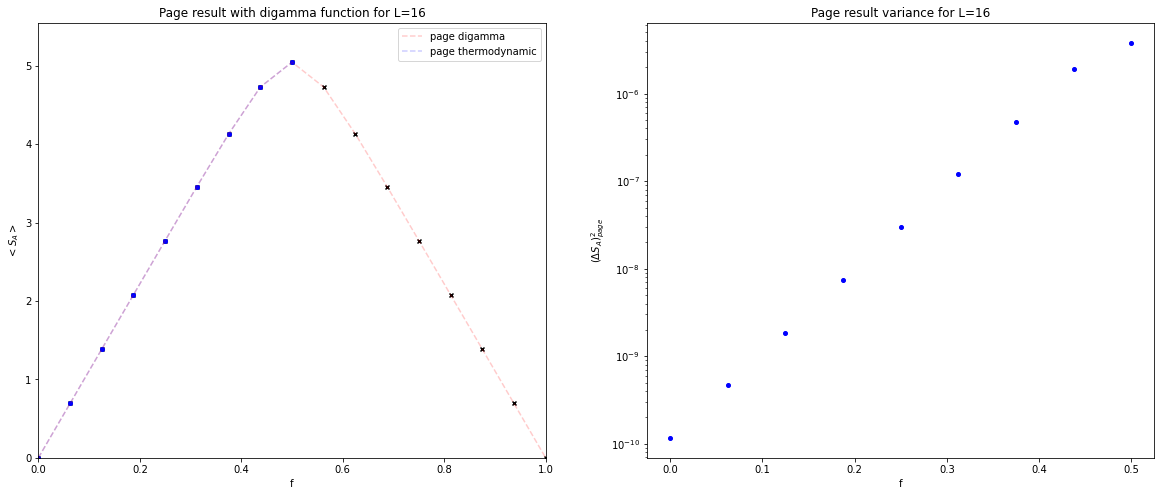

In [65]:
def plot_page(L, legend = True):
    N = np.power(2, L)
    fig, ax = plt.subplots(1,2, figsize = (20,8))
    ax[0].set_xlabel("f")
    ax[1].set_xlabel("f")
    ax[0].set_ylabel("$<S_A>$")
    ax[1].set_ylabel("$(\Delta S_A )^2 _{page}$")

    points = []
    pages = []
    pages_thermo = []
    for L_a in np.arange(0, L+1):
        d_a = np.power(2, L_a)
        d_b = np.power(2, L-L_a)
        f=L_a/L
        page = page_result(d_a, d_b)
        page_var = page_result_var(d_a, d_b)
        page_therm = page_thermodynamic(f, L)
        page_therm_var = page_thermodynamic_var(f, L)
        
        ax[0].scatter(f, page, c='black', marker ='x')
        if(L_a <= L//2):
            ax[0].scatter(f, page_therm, c='blue', marker ='o')
            #ax[1].scatter(f, page_var, c='black', marker ='x')
            ax[1].scatter(f, page_therm_var, c='blue',marker ='o')
        
        points.append(f)
        pages.append(page)
        
        pages_thermo.append(page_therm)
        
    ax[0].plot(points, pages, color='red', ls = '--', alpha = 0.2, label = "page digamma")
    ax[0].plot(points[0:-L//2], pages_thermo[0:-L//2], color='blue', ls = '--', alpha = 0.2, label = "page thermodynamic")
    if legend:
        ax[0].legend()
    ax[0].set_title(f"Page result with digamma function for L={L}")
    ax[1].set_title(f"Page result variance for L={L}")
    
    ax[1].set_yscale('log')
    ax[0].set_xlim([0, 1])
    ax[0].set_ylim([0, 1/2 * L * np.log(2) + np.power(2., -L)])
    return ax
plot_page(16)

### MANY PAGES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([[<AxesSubplot:title={'center':'Average entropy over different lattice sizes'}, xlabel='f', ylabel='$<S_A>$'>,
         <AxesSubplot:title={'center':'Average entropy density over different lattice sizes'}, xlabel='f', ylabel='$<S_A>/V$'>],
        [<AxesSubplot:title={'center':'Average entropy variance over different lattice sizes'}, xlabel='f', ylabel='$(\\Delta S_A )^2$'>,
         <AxesSubplot:title={'center':'Entropy samples for different system sizes'}, xlabel='$f$', ylabel='$<S_A>$'>]],
       dtype=object),
 {10: 'o', 14: 's', 18: 'v', 20: '+'},
 {10: 'tab:pink', 14: 'tab:gray', 18: 'tab:olive', 20: 'tab:cyan'})

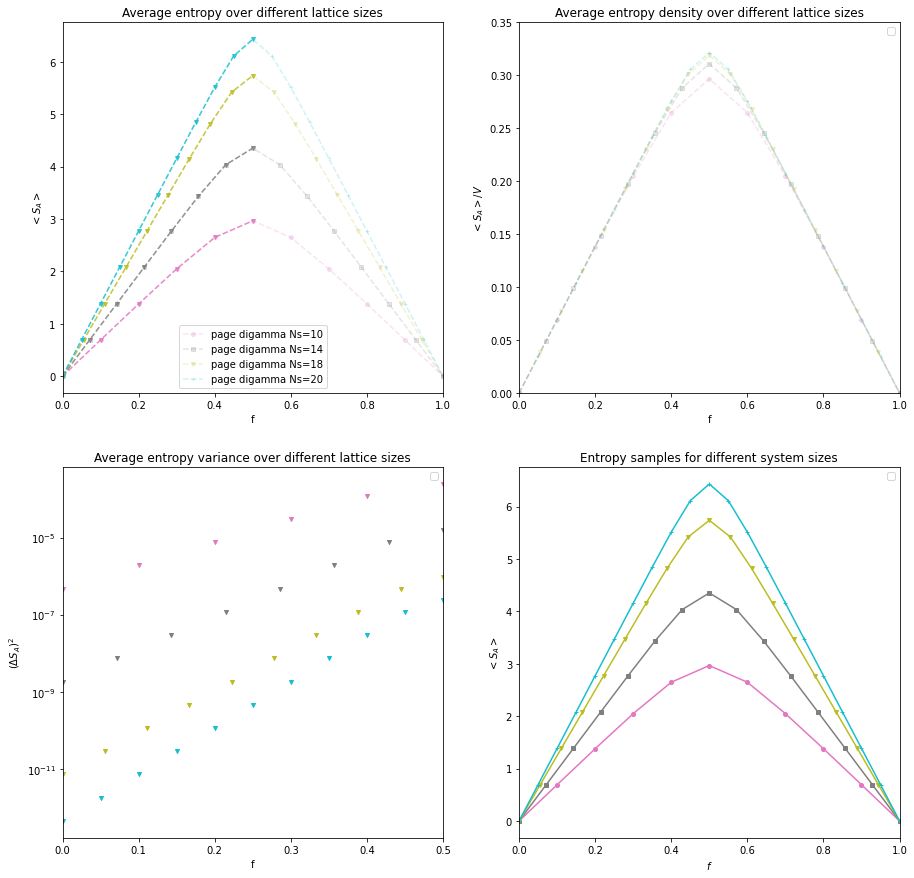

In [66]:
def plot_pages(L, legend = True):
    fig, ax = plt.subplots(2,2, figsize = (15,15))
    
    ax[0][0].set_xlim([0, 1])
    ax[0][0].set_xlabel("f")
    ax[0][0].set_ylabel("$<S_A>$")
    ax[0][0].set_title(f"Average entropy over different lattice sizes")
    
    ax[0][1].set_xlim([0, 1])
    ax[0][1].set_xlabel("f")
    ax[0][1].set_ylabel("$<S_A>/V$")
    ax[0][1].set_title(f"Average entropy density over different lattice sizes")
    ax[0][1].set_ylim([0, np.log(2) * 1/2])
    ax[0][1].set_yticks([0.05 * i for i in range(0, 8)])
    
    ax[1][0].set_xlim([0, 0.5])
    ax[1][0].set_yscale('log')
    ax[1][0].set_xlabel("f")
    ax[1][0].set_ylabel("$(\Delta S_A )^2$")
    ax[1][0].set_title(f"Average entropy variance over different lattice sizes")
    
    ax[1][1].set_xlim([0, 1])
    ax[1][1].set_xlabel("$f$")
    ax[1][1].set_ylabel("$<S_A>$")
    ax[1][1].set_title("Entropy samples for different system sizes")
    
    col = {}
    mark = {}
    
    for l in L:  
        N = np.power(2, l)
    
        points = []
        pages = []
        pages_thermo = []
        
        color_page = next(colors_ls_cyc)
        marker_page = next(markers)
        color_page_therm = color_page
        marker_page_therm = 'v'
        for L_a in np.arange(0, l+1):
            d_a = np.power(2, L_a)
            d_b = np.power(2, l-L_a)
            f=L_a/l
            
            mark[l] = marker_page
            col[l] = color_page
            
            page = page_result(d_a, d_b)
            page_var = page_result_var(d_a, d_b)
            page_therm = page_thermodynamic(f, l)
            page_therm_var = page_thermodynamic_var(f, l)
            
            if(L_a <= l//2):
                #ax[1][0].scatter(f, page_var, c=color_page, marker = marker_page)
                ax[1][0].scatter(f, page_therm_var, c=color_page_therm, marker = marker_page_therm)
            
            points.append(f)
            pages.append(page)
            pages_thermo.append(page_therm)
        
        ax[0][0].plot(points, pages, color=color_page, marker = marker_page, ls = '--',
                   alpha = 0.2, label = f"page digamma Ns={l}")
        
        ax[0][0].plot(points[0:-l//2], pages_thermo[0:-l//2], color=color_page_therm,
                   marker = marker_page_therm, ls = '--',
                   alpha = 0.8)
                
        ax[0][1].plot(points, np.array(pages)/l, color=color_page, marker = marker_page, ls = '--',
                    alpha = 0.2)
       
        ax[1][1].plot(points, pages, color=color_page, marker = marker_page, ls = '-',
                   alpha = 1.0)


    if legend:
        ax[0][0].legend()
        ax[0][1].legend()
        ax[1][0].legend()
        ax[1][1].legend()
        
    return ax, mark, col
plot_pages([10,14,18,20])

### AVERAGES

In [67]:
def plot_model_av(frac, l, directory = f"{kPSep}resultsSym", k = 0, p = 1, x = 1, bc = 0):
    model = create_model(model_name, l, k, p, x, bc)
    
    entropies, av_idx, state_num, N, idx_dic = read_entropies(model.get_dir(directory), l, frac)
    av = entropies.mean(axis=1)
    var = entropies.mean(axis=1)
    
    ax = plot_page(model.Ns, False)
    ax[0].plot(av.index/l, av, label = model.get_info())
    ax[1].plot(var.index/l, var, label = model.get_info(), marker = 'x')
    ax[0].legend()
    ax[1].legend()
    return df, fraction
    
def plot_many_scatters(df, ax, color, marker, l, label):
    minima = []
    averages = []
    seventy_fives = []
    quoters = []
    pages = []
    for col in df.columns[1:]:
        x = [float(col) for i in range(len(df))]
        ax.scatter(x, np.array(df[col]), color = color, marker = marker, s = 2, alpha = 0.1)
        minima.append(np.min(np.array(df[col])))
        averages.append(np.average(np.array(df[col])))
        seventy_fives.append(np.quantile(np.array(df[col]),0.75))
        quoters.append(np.quantile(np.array(df[col]), 0.25))
    # pages only
    for L_a in np.arange(1, l//2 + 1):
        d_a = np.power(2, L_a)
        
        d_b = np.power(2, l-L_a)
        pages.append(page_result(d_a, d_b))
        
    x = [i/l for i in range(1,l//2+1)]
    
    alpha = 0.05
    ax.fill_between(np.array(x), minima, pages, color=color, alpha=alpha, interpolate=False)
    alpha *= 2
    ax.fill_between(np.array(x), seventy_fives, pages, color=color, alpha=alpha, interpolate=False)
    alpha *= 2
    ax.fill_between(np.array(x), averages, pages, color=color, alpha=alpha, interpolate=False)
    alpha *= 2
    ax.fill_between(np.array(x), quoters, pages, color=color, alpha=alpha, interpolate=False, label = label)

def plot_model_avs(L, frac, directory = f"{kPSep}resultsSym", sector = 'all', k = 0, p = 1, x = 1, bc = 0):
    ax, markers, colors = plot_pages(L, False)
    
    df = pd.DataFrame()
    df_var = pd.DataFrame()
    df_all = pd.DataFrame()
    label = ''
    for l in L:
        model = create_model(model_name, l, k, p, x, bc)
        label = model.get_info() if sector=='single' else model.get_info_wo_sym()
        
        # check how many sectors do we wanto to get
        if sector == 'single':
            entropies, av_idx, state_num, N, idx_dic = read_entropies(model.get_dir(directory), l, frac)
            df = entropies.mean(axis=1)
            df_var = entropies.mean(axis=1)
            df_all = model.concat_entropies(frac, directory, sector)
        else:
            df = model.symmetry_sectors_all(frac, directory, var = False).mean(axis=1)
            df_var = model.symmetry_sectors_all(frac, directory, var = True).mean(axis=1)
            df_all = model.concat_entropies(frac, directory, sector)
        print(df)
        plot_many_scatters(df_all, ax[1][1], colors[l], markers[l], l, label = label)            
        ax[0][0].plot(df.index/l, df, label = label, color = colors[l], marker=markers[l])
        ax[0][1].plot(df.index/l, df/l, label = label, color = colors[l], marker=markers[l])
        ax[1][0].plot(df_var.index/l, df_var, label = label, color = colors[l], marker=markers[l])
        
    # plot the lines
    inverse_L = 1.0/np.array(L)
       
    average_name = "ED states" if not sym else (f"single sector {(k, p)}" if sector=='single' else sector)
    
    fontsize = 12
    
    ax[0][0].set_title(f"Average entropy over {average_name} for different system sizes - v={frac}", fontsize = fontsize)
    ax[0][1].set_title(f"Average entropy density over {average_name} for different system sizes - v={frac}", fontsize = fontsize)
    ax[1][0].set_title(f"Average entropy variance over {average_name} for different system sizes - v={frac}", fontsize = fontsize)
    ax[1][1].set_title(f"Entropy samples over {average_name} for different system sizes - v={frac}", fontsize = fontsize)
    
    fontsize = 7
    ax[0][0].legend(loc='lower center', fontsize = fontsize)
    ax[0][1].legend(loc='lower center', fontsize = fontsize)
    ax[1][0].legend(loc='lower right', fontsize = fontsize)
    ax[1][1].legend(loc='lower center', fontsize = fontsize)
    

    plt.savefig(directory + label + f",type={model_name},sym={sym},frac={frac},sector={sector},L={L}.png", facecolor='white')
    plt.savefig(directory + label + f",type={model_name},sym={sym},frac={frac},sector={sector},L={L}.pdf", facecolor='white')


# LAST

## ALL

			idx_roll=111,idx_mean=122,idx_dos=107,idx_max=107,we take mean
			E[idx_roll]=-0.024660160878535394,E[idx_mean]=0.317753193864426,E[idx_dos]=-0.10861362373319891,E[idx_max]=-0.10861362373319891
			Entropy[idx]=3.438982857239075,Entropy_max=3.6463420808047964,entropy_roll_max=3.4652796674622586,entropy_roll_max[idx]=3.4525914298506266
			taking the whole dataframe
	->l=12,k=0,p=1,model=xyz->[100->122->144]:mean around 44
			idx_roll=1054,idx_mean=1198,idx_dos=1115,idx_max=1161,we take mean
			E[idx_roll]=-0.3779224129632177,E[idx_mean]=0.1303811516948052,E[idx_dos]=-0.16442618954325144,E[idx_max]=0.004790739708216835
			Entropy[idx]=4.94071403633513,Entropy_max=4.9764127804073315,entropy_roll_max=4.944812280413154,entropy_roll_max[idx]=4.94236411349412
			taking the whole dataframe
	->l=16,k=0,p=1,model=xyz->[973->1198->1423]:mean around 450
			idx_roll=3788,idx_mean=4067,idx_dos=3841,idx_max=3955,we take mean
			E[idx_roll]=-0.22833285907328058,E[idx_mean]=0.07377840027088016,E[idx_

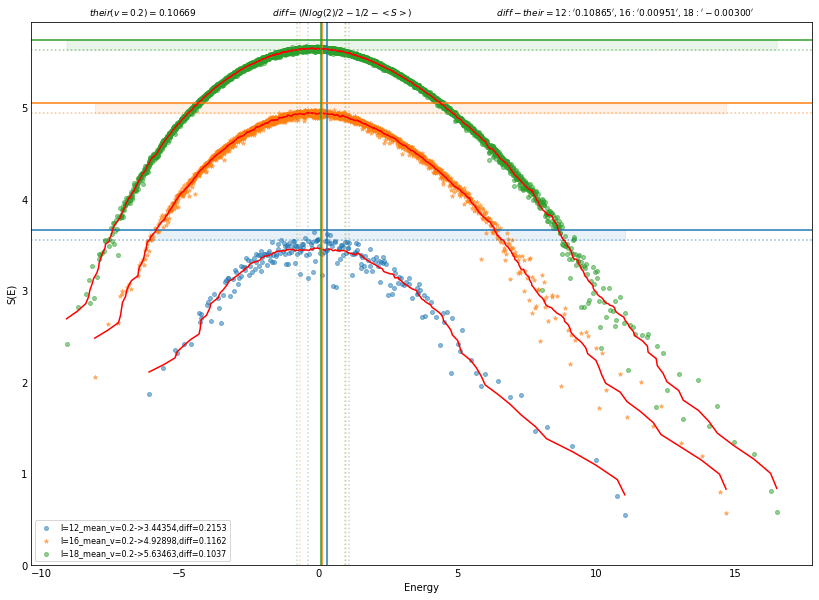

In [69]:
Ls=[12, 16, 18]
bc = 0
k = 0
p = 1
x = 1

frac = 1.0
frac_c = 0.2
#xlim = None
plot_all(Ls, directory, k, p, x, bc, frac_c)

## TOGETHER

[2.9577281878233306, 3.642027871759994, 4.303230682125751, 4.979413981048005]
10 0.2966305476841614
12 0.3049187911050462
14 0.3108618476728057
16 0.31532414658865665
0.014257552495863798 283
0.010684463524026862 1109
0.005339855095470411 4379
0.002862592069560369 17367


([(283, 0.014257552495863798),
  (1109, 0.010684463524026862),
  (4379, 0.005339855095470411),
  (17367, 0.002862592069560369)],
 [(241, -0.45596626244364585),
  (988, -0.3660457352294898),
  (4392, 0.015616206485983553),
  (16500, -0.19634198961501137)],
 [(256, -0.28353507331203104),
  (1025, -0.254660203229172),
  (4101, -0.23110483244788652),
  (16437, -0.21087977579389974)])

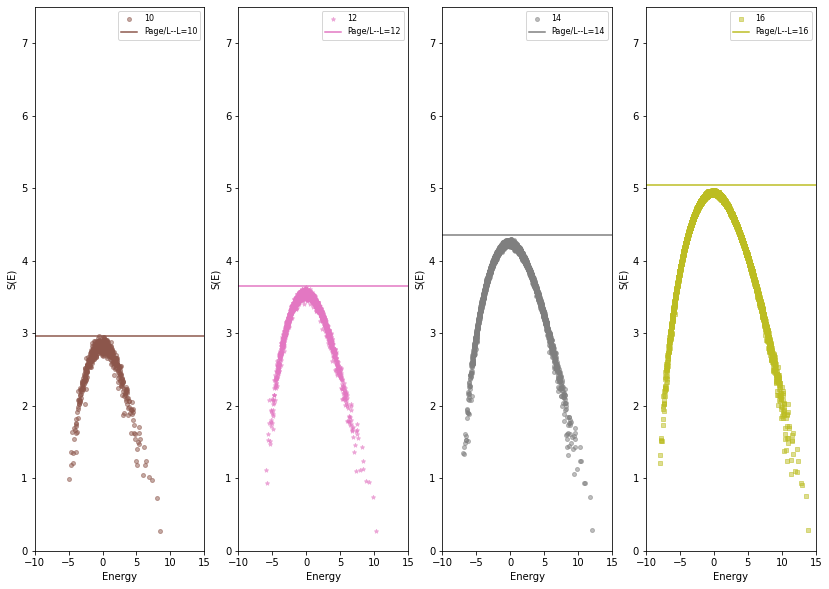

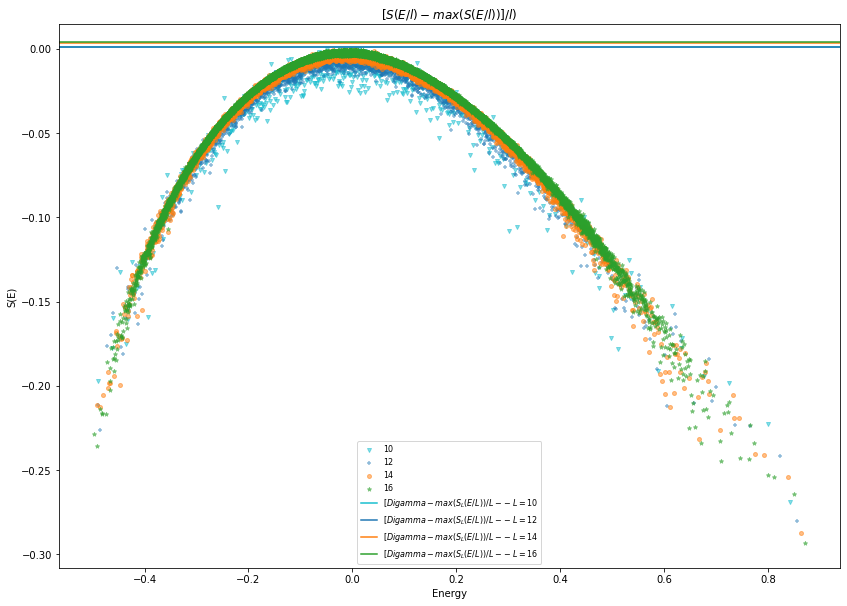

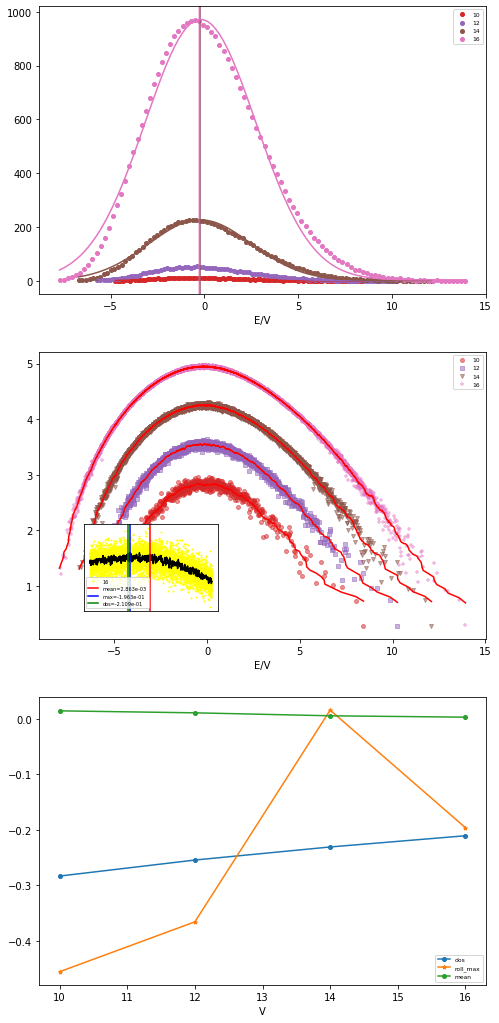

In [147]:
Ls=[10, 12, 14, 16]
bc = 1
k = 0
p = 1
x = 1
frac_c = 0.2

dfs = []
ens = []
for L in Ls:
    model = create_model(model_name, L, k, p, x, bc)
    entropies = read_entro_h5(model.get_dir(directory), L)
    energies = read_energy_h5(model.get_dir(directory)).to_numpy().flatten()
    dfs.append(entropies)
    ens.append(energies)

plot_df_together(Ls, dfs, ens)
plot_rescale_df(Ls, dfs, ens)
maxima_df(Ls, dfs, ens, bin_num=100)

## MAXIMA

			idx_roll=158,idx_mean=178,idx_dos=163,idx_max=185,we take mean
			E[idx_roll]=-0.35182562467365763,E[idx_mean]=0.009107433140585122,E[idx_dos]=-0.28808834932344257,E[idx_max]=0.10434475316817565
			Entropy[idx]=3.4740138993070344,Entropy_max=3.6306447238614075,entropy_roll_max=3.5395451143326255,entropy_roll_max[idx]=3.5225482341541636
			taking the whole dataframe
			idx_roll=616,idx_mean=614,idx_dos=573,idx_max=600,we take mean
			E[idx_roll]=0.013766473163668682,E[idx_mean]=-0.000280824320093164,E[idx_dos]=-0.2522354696930925,E[idx_max]=-0.08635611654813152
			Entropy[idx]=4.23406539005504,Entropy_max=4.306372381445124,entropy_roll_max=4.254207704334477,entropy_roll_max[idx]=4.253400067414792
			taking the whole dataframe
			idx_roll=1967,idx_mean=2156,idx_dos=2035,idx_max=2116,we take mean
			E[idx_roll]=-0.3591346873407744,E[idx_mean]=-0.0009233069170404975,E[idx_dos]=-0.2313167147556617,E[idx_max]=-0.07565289865898214
			Entropy[idx]=4.95691222645661,Entropy_max=4.979959277826

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


			idx_roll=26666,idx_mean=27493,idx_dos=26336,idx_max=25987,we take mean
			E[idx_roll]=-0.13750829270746978,E[idx_mean]=3.2507115639496994e-05,E[idx_dos]=-0.19188644645859845,E[idx_max]=-0.24995435759007764
			Entropy[idx]=6.343725111476556,Entropy_max=6.357664110403039,entropy_roll_max=6.348945838538019,entropy_roll_max[idx]=6.345371570125975
			taking the whole dataframe
Maximum entropies: [3.6306447238614075, 4.306372381445124, 4.979959277826795, 5.669196450538999, 6.357664110403039]


([(178, 0.009107433140585122),
  (614, -0.000280824320093164),
  (2156, -0.0009233069170404975),
  (7650, 0.0003711625509669976),
  (27493, 3.2507115639496994e-05)],
 [(158, -0.35182562467365763),
  (616, 0.013766473163668682),
  (1967, -0.3591346873407744),
  (7375, -0.1571381628905848),
  (26666, -0.13750829270746978)],
 [(163, -0.28808834932344257),
  (573, -0.2522354696930925),
  (2035, -0.2313167147556617),
  (7286, -0.2070778264871189),
  (26336, -0.19188644645859845)],
 [(159, -0.3334042915642832),
  (453, -1.0007528036743494),
  (1811, -0.6504478087871471),
  (6425, -0.6888366272249377),
  (23614, -0.6392931997719553)])

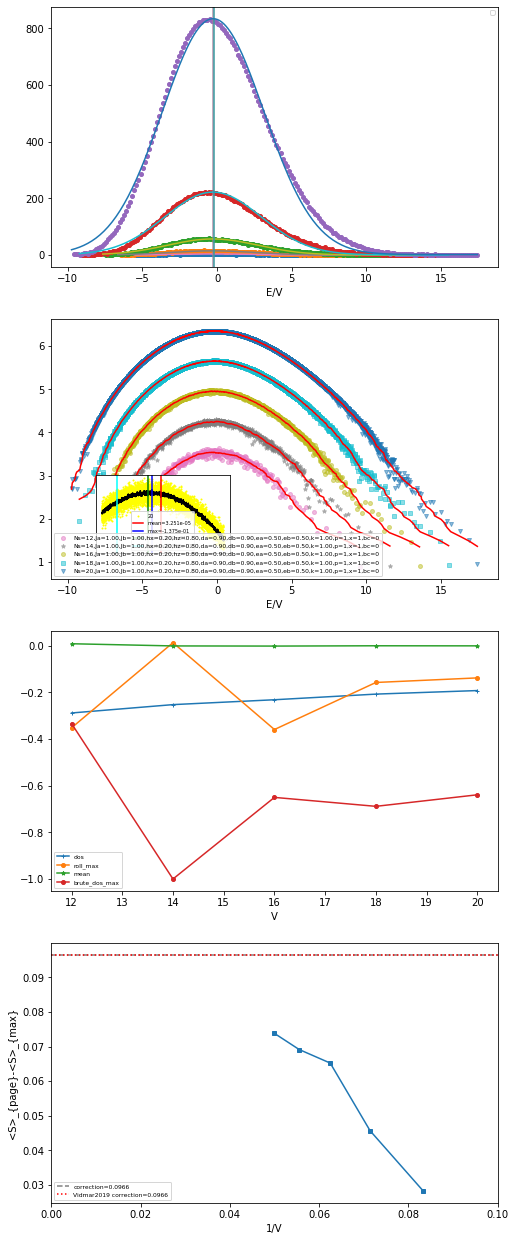

In [156]:
Ls=[12, 14, 16, 18, 20]
bc = 0
k = 1
p = 1
x = 1
bin_num = 200

maxima(Ls, directory, bin_num=bin_num, k=k, p=p, bc=bc)

## CLOUD

----------------------> STARTING PBC <----------------------


	-->For 14,sym=(0, 1),frac=500,bc=0 reading the whole entropies file binary
			idx_roll=311,idx_mean=370,idx_dos=336,idx_max=280,we take mean
			E[idx_roll]=-0.4244424257485535,E[idx_mean]=0.22543064266420518,E[idx_dos]=-0.1480735136759758,E[idx_max]=-0.7618499019643901
			Entropy[idx]=4.264847295358512,Entropy_max=4.286455056530887,entropy_roll_max=4.228164994480893,entropy_roll_max[idx]=4.1988812038766445
	--->Ns=14,k=0,p=1,{'roll': (311, -0.4244424257485535), 'mean': (370, 0.22543064266420518), 'dos': (336, -0.1480735136759758), 'idx': (370, 0.22543064266420518), 'max': (280, -0.7618499019643901)}
	-->For 14,sym=(1, 1),frac=500,bc=0 reading the whole entropies file binary
			idx_roll=616,idx_mean=614,idx_dos=573,idx_max=600,we take mean
			E[idx_roll]=0.013766473163668682,E[idx_mean]=-0.000280824320093164,E[idx_dos]=-0.2522354696930925,E[idx_max]=-0.08635611654813152
			Entropy[idx]=4.23406539005504,Entropy_max=4.3063723

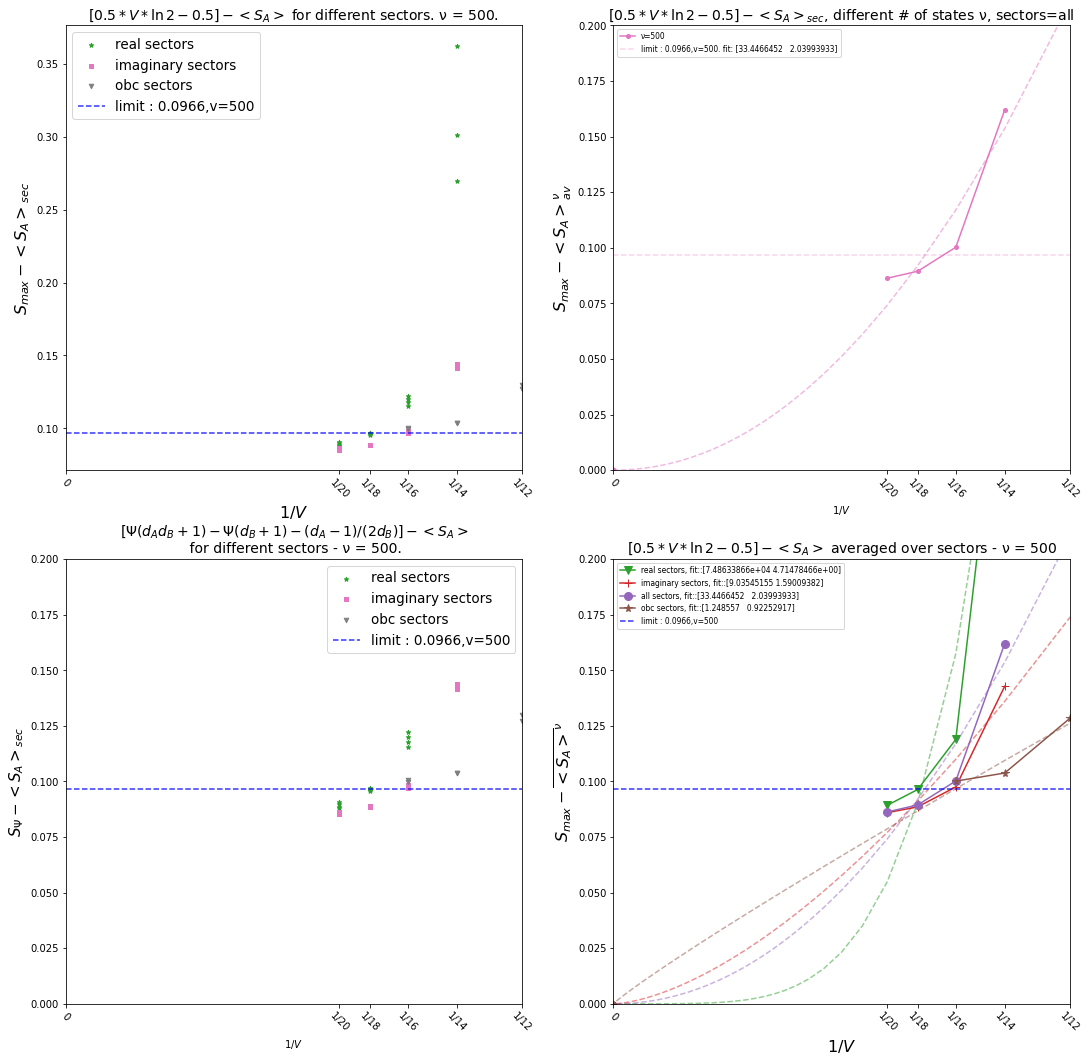

(        14        16        18        20
 500  0.162  0.100216  0.089432  0.086289,
 {'real': array([7.48633866e+04, 4.71478466e+00]),
  'img': array([9.03545155, 1.59009382]),
  'all': array([33.4466452 ,  2.03993933]),
  'obc': array([1.248557  , 0.92252917])},
 {500: array([33.4466452 ,  2.03993933])},
 {'(14, 500)': array([4.08226389, 4.20854071, 4.20806044, 4.21012905, 4.20878444,
         4.21064141, 4.20944305, 3.98958361, 4.20944305, 4.21064141,
         4.20878444, 4.21012905, 4.20806044, 4.20854071, 4.05074161]),
  '(16, 500)': array([4.92737325, 4.94775388, 4.94677047, 4.94818138, 4.94785626,
         4.94755415, 4.94780035, 4.9476788 , 4.92980004, 4.9476788 ,
         4.94780035, 4.94755415, 4.94785626, 4.94818138, 4.94677047,
         4.94775388, 4.92515129, 4.92276004]),
  '(18, 500)': array([5.64177005, 5.64974813, 5.64990991, 5.64980838, 5.64976427,
         5.64989167, 5.64976129, 5.64936834, 5.64986257, 5.64263442,
         5.64986257, 5.64936834, 5.64976129, 5.64989

In [158]:
Ls=[14, 16, 18, 20]

fractions = [500]

avs = 'av_Sr'
avs = 'av_So'
avs = 'av_S'
#avs = 'av_Sobc'

fit_fun = fit_one_over_v2
fit_fun = fit_one_over_v
fit_fun = fit_power
direct = directory
#direct = directory_save
dif_fun = digamma_difference
#dif_fun = page_difference

xscale = 'linear'
yscale = 'linear'
#xscale = 'log'
#yscale = 'log'

ylim = [0, 0.2]

plot_difference_cloud(Ls, fractions, directory, xscale=xscale, yscale=yscale,
                      ylim = ylim, fit_fun = fit_fun, avs=avs, dif_fun=dif_fun)

## MANY

	-->For 12,sym=(0, 1),frac=0.1,bc=0 reading the whole entropies file binary
			idx_roll=111,idx_mean=122,idx_dos=107,idx_max=107,we take max
			E[idx_roll]=-0.024660160878535394,E[idx_mean]=0.317753193864426,E[idx_dos]=-0.10861362373319891,E[idx_max]=-0.10861362373319891
			Entropy[idx]=3.6463420808047964,Entropy_max=3.6463420808047964,entropy_roll_max=3.4652796674622586,entropy_roll_max[idx]=3.465081386563818
	--->Ns=12,k=0,p=1,{'max': (111, -0.024660160878535394), 'mean': (122, 0.317753193864426), 'dos': (107, -0.10861362373319891), 'idx': (107, -0.10861362373319891)}
	-->For 12,sym=(1, 1),frac=0.1,bc=0 reading the whole entropies file binary
			idx_roll=158,idx_mean=178,idx_dos=163,idx_max=186,we take max
			E[idx_roll]=-0.35182562467365763,E[idx_mean]=0.009107433140585122,E[idx_dos]=-0.28808834932344257,E[idx_max]=0.12791485990995935
			Entropy[idx]=3.6306447238614075,Entropy_max=3.6306447238614075,entropy_roll_max=3.5395451143326255,entropy_roll_max[idx]=3.523765731006479
	--->Ns=

ValueError: zero-size array to reduction operation minimum which has no identity

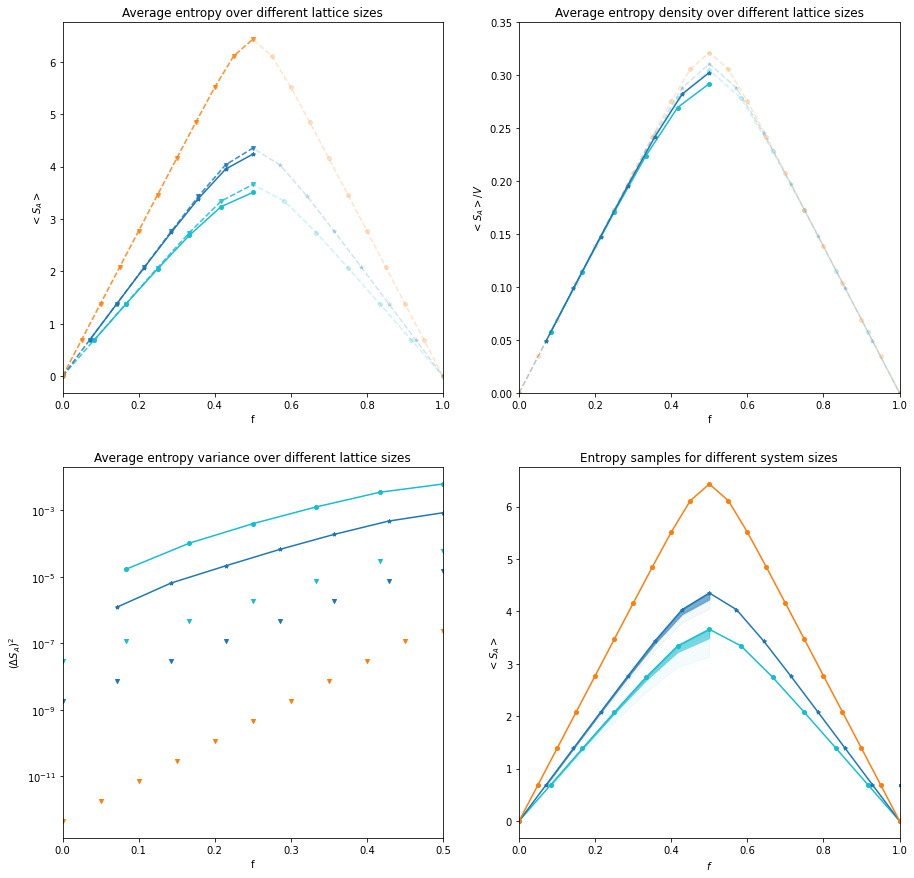

In [277]:
Ls=[12, 14, 20]
bc = 0
k = 0
p = 1
x = 1
sector = 'all'
plot_model_avs(Ls, 0.1, directory, sector, k, p, x, bc)


# COMPARE WITH RAFAL

In [145]:
Ns = 10
bc = 1


k = 0
p = 1
x = 1


fraction=10

model = xyz(Ns, sym = sym, k = k, p = p, x = x, bc = bc)

In [146]:
model.p = 1
model.set_Ns(Ns)
en_k0p1 = read_energy_bin(model.get_dir(directory))
en_k0p1


,energy
0,-4.888616
1,-4.625845
2,-4.612575
3,-4.473156
4,-4.349888
...,...
523,6.342200
524,6.773189
525,7.247627
526,8.007506


In [147]:
e_k0p1 = read_entro_h5(model.get_dir(directory), Ns)
e_k0p1 = np.array(e_k0p1.iloc[-1]).flatten() if len(e_k0p1) != 0 else []
e_k0p1

array([0.98374637, 1.18224174, 1.35744925, 1.63530289, 1.20526996,
       1.35251425, 1.69143932, 1.53941248, 1.6710266 , 1.71596321,
       1.3686098 , 1.76319161, 1.81903115, 1.6295962 , 1.74408718,
       1.64353597, 1.92174429, 2.07616876, 1.8304705 , 1.98648223,
       2.21120379, 1.95587998, 2.03014828, 2.09688779, 2.0549784 ,
       2.02509336, 2.08671877, 2.1482504 , 2.0595121 , 2.08192453,
       2.21534658, 2.06225135, 2.23952821, 2.1432686 , 2.23677545,
       2.17002656, 2.22632044, 2.1983539 , 2.10717582, 2.30616046,
       2.34259267, 2.32922282, 2.2441733 , 2.20633343, 2.29136705,
       2.31542217, 2.26035734, 2.23911903, 2.38674722, 2.33839884,
       2.22589646, 2.28273033, 2.35843867, 2.33865786, 2.44588843,
       2.35803362, 2.41409701, 2.35885916, 2.29771998, 2.35583795,
       2.34774807, 2.33669312, 2.32862522, 2.40618624, 2.42512132,
       2.01932959, 2.46060245, 2.49928804, 2.38752393, 2.52508374,
       2.5230943 , 2.38644744, 2.37198297, 2.4080616 , 2.66343

In [154]:
model.p = -1
model.set_Ns(Ns)
en_k0p0 = read_energy_h5(model.get_dir(directory))
en_k0p0


c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz_sym2\resultsXYZ10\_xyz_sym,Ns=10,Ja=1.00,Jb=1.00,hx=0.20,hz=0.80,da=0.90,db=0.90,ea=0.50,eb=0.50,k=0.00,p=-1,x=1,bc=1\ doesn't exists


""


In [149]:
e_k0p0 = read_binary(model.get_dir(directory), Ns)
e_k0p0 = np.array(e_k0p0.iloc[-1]).flatten() if len(e_k0p0) != 0 else []
e_k0p0

directory does not exist


[]

In [150]:
import h5py
dir = f"{current_dir}{kPSep}xyz_sym{kPSep}resultsXYZ{Ns}{kPSep}"
filename = dir + f'_L={Ns},J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize={Ns//2}.hdf5'
print(filename)
entropies = None
energies = None
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    
    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array
    print(f['entropy'][()])
    energies=pd.DataFrame(np.array(f['energies'][()]).flatten(), columns=['energies'])
    entropies=pd.DataFrame(np.array(f['entropy'][()]).flatten(), columns=['entropy'])


rafal_together = entropies
rafal_together['energies'] = energies.to_numpy().flatten()
rafal_together


c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz_sym\resultsXYZ10\_L=10,J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize=5.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
<class 'h5py._hl.dataset.Dataset'>
[[0.98374637 1.12904441 1.18224174 ... 0.83881316 0.73068862 0.26943459]]


,entropy,energies
0,0.983746,-4.888616
1,1.129044,-4.742820
2,1.182242,-4.625845
3,1.641963,-4.613102
4,1.357449,-4.612575
...,...,...
1019,1.018389,6.773189
1020,0.974966,7.247627
1021,0.838813,7.449220
1022,0.730689,8.007506


In [153]:
my_together=pd.DataFrame(np.array(list(e_k0p0) + list(e_k0p1)).flatten(), columns=['entropy'])
print(my_together)
my_together['energies'] = list(en_k0p0) + list(en_k0p1)

my_together.sort_values('energies', inplace=True)
my_together.reset_index(inplace=True)
my_together

      entropy
0    0.983746
1    1.182242
2    1.357449
3    1.635303
4    1.205270
..        ...
523  1.240549
524  1.018389
525  0.974966
526  0.730689
527  0.269435

[528 rows x 1 columns]


ValueError: Length of values (1) does not match length of index (528)

In [108]:
my_together-rafal_together

,energies,entropy,index
0,-0.233200,0.764080,NaN
1,0.166531,1.105715,NaN
2,0.183965,1.142269,NaN
3,0.437748,0.653235,NaN
4,0.431120,0.636768,NaN
...,...,...,...
4091,NaN,NaN,NaN
4092,NaN,NaN,NaN
4093,NaN,NaN,NaN
4094,NaN,NaN,NaN


### PLOT RAFAL

In [40]:
import h5py

def read_h5py(Ns):
    filename = directory + f'{Ns}{kPSep}_L={Ns},J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize={Ns//2}.hdf5'
    print(filename)
    entropies = None
    energies = None
    with h5py.File(filename, "r") as f:
        # Print all root level object names (aka keys) 
        # these can be group or dataset names 
        print("Keys: %s" % f.keys())
        # get first object name/key; may or may NOT be a group
        a_group_key = list(f.keys())[0]
        
        # get the object type for a_group_key: usually group or dataset
        print(type(f[a_group_key])) 

        # If a_group_key is a group name, 
        # this gets the object names in the group and returns as a list
        data = list(f[a_group_key])

        # If a_group_key is a dataset name, 
        # this gets the dataset values and returns as a list
        data = list(f[a_group_key])
        # preferred methods to get dataset values:
        ds_obj = f[a_group_key]      # returns as a h5py dataset object
        ds_arr = f[a_group_key][()]  # returns as a numpy array
        #print(f['entropy'][()])
        energies=pd.DataFrame(np.array(f['energies'][()]).flatten(), columns=['energies'])
        entropies=pd.DataFrame(np.array(f['entropy'][()]).flatten(), columns=['entropy'])
    return energies, entropies

energies, entropies = read_h5py(10)

rafal_together = entropies
rafal_together['energies'] = energies.to_numpy().flatten()
rafal_together


c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz\resultsXYZ10\_L=10,J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize=5.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
<class 'h5py._hl.dataset.Dataset'>


,entropy,energies
0,1.004336,-4.793733
1,0.837159,-4.764304
2,0.919466,-4.677039
3,1.400654,-4.590775
4,1.533951,-4.449649
...,...,...
1019,0.841107,6.701428
1020,0.977841,6.879629
1021,0.834789,7.086942
1022,0.701441,7.595552


In [41]:
dfs=[]
fraction=100
ls = [Ns for Ns in range(8,15,2)]
for Ns in ls:
    en, df = read_h5py(Ns)
    en = np.array(en).flatten()
    idx = find_nearest_idx_np(en, np.mean(en))
    
    dfs.append(float(df.iloc[idx-fraction//2:idx+fraction//2].mean()))
dfs

c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz\resultsXYZ8\_L=8,J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize=4.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
<class 'h5py._hl.dataset.Dataset'>
c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz\resultsXYZ10\_L=10,J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize=5.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
<class 'h5py._hl.dataset.Dataset'>
c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz\resultsXYZ12\_L=12,J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize=6.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
<class 'h5py._hl.dataset.Dataset'>
c:\University\PHD\CODES\VQMC\VarQMCSolver\Python\xyz\resultsXYZ14\_L=14,J=0.50,J0=0.50,g=0.90,g0=0.90,h=0.80,w=0.20_subsize=7.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
<class 'h5py._hl.dataset.Dataset'>


[2.1134867405140696, 2.8407051663945238, 3.546476885269795, 4.249709168671699]

(0.0, 0.1)

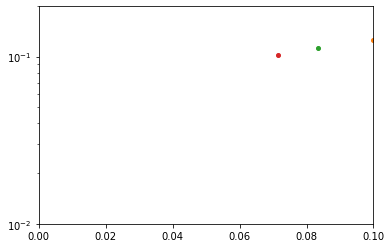

In [44]:
loc = 2
for l, df in enumerate(dfs):
    name = ls[l]
    value = name/2 * np.log(2) - 1/2 - df
    plt.scatter(1.0/(name), value)
plt.yscale('log')
plt.ylim([1e-2,2e-1])
plt.xlim([0, 1/10])